In [1]:
import numpy as np
import pandas as pd
import os
cnt=0
for dirname, _, filenames in os.walk('../Stocks/'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        cnt+=1
print(cnt, 'files in',' ..Stocks/', 'folder')
date_start = '2010-01-01'
date_end = '2014-12-31'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

7195 files in  ..Stocks/ folder


In [2]:
d_files = dict()
def get_names(date_start = '2010-01-01', date_end = '2014-12-30'):
    import os 
    from pandas.errors import EmptyDataError 
    global d_files
    names = []
    for dirname, _, filenames in os.walk('../Stocks/'):
        for filename in filenames:
            filepath = os.path.join(dirname, filename)
            try:
                df = pd.read_csv(filepath, delimiter=',')
                if min(df['Date']) > date_start or max(df['Date']) < date_end:
                    continue
                
                df = df[(df['Date']>date_start) & (df['Date']<=date_end)]
                if df.shape[0] == 1256:
                    names.append(filepath)
                if df.shape[0] in d_files.keys():
                    d_files[df.shape[0]] += 1
                else:
                    d_files[df.shape[0]] = 1
                # TODO
                #if df.shape[0] == 1257 (324 companies):
                #.   define method merge_dates()
                #    names.append(filepath)
            except EmptyDataError:
                continue
    return names

In [3]:
import time
start_time = time.time()
valid_names = get_names()
print("--- %s seconds ---" % (time.time() - start_time))
print(format(len(valid_names)/cnt, '%'), f'({len(valid_names)})', 'files are valid')

--- 53.61300301551819 seconds ---
33.856845% (2436) files are valid


In [4]:
print(dict(sorted(d_files.items(), key=lambda item: item[1], reverse = True)[:10]))

{1256: 2436, 1257: 367, 1255: 74, 1254: 41, 1253: 22, 1251: 21, 1252: 20, 1248: 16, 1249: 14, 1243: 11}


In [5]:
start_time = time.time()

tickers = []
Open = []
Close = []
High = []
Low = []
Volume = []
for filename in valid_names:
    ticker = filename.split('/')[-1].strip('.txt')
    tickers.append(ticker)
    
    df = pd.read_csv(filename, delimiter=',')
    df = df[(df['Date']>date_start) & (df['Date']<=date_end)]
    Open.append(np.array(df['Open']))
    Close.append(np.array(df['Close']))
    High.append(np.array(df['High']))
    Low.append(np.array(df['Low']))
    Volume.append(np.array(df['Volume']))
    
dates = np.array(df['Date'])
Open = pd.DataFrame(Open, columns = dates, index = tickers)
Close = pd.DataFrame(Close, columns = dates, index = tickers)
High = pd.DataFrame(High, columns = dates, index = tickers)
Low = pd.DataFrame(Low, columns = dates, index = tickers)
Volume = pd.DataFrame(Volume, columns = dates, index = tickers)
print("--- %s seconds ---" % (time.time() - start_time))

--- 18.16303563117981 seconds ---


In [6]:
Close.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2014-12-17,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,2014-12-26,2014-12-29,2014-12-30,2014-12-31
aan.us,18.1900,18.2470,18.3840,18.3840,18.4040,18.7280,18.6310,18.8160,18.9630,18.9440,...,27.917,28.343,28.333,28.936,29.788,30.027,30.124,30.709,30.431,30.282
aaon.us,5.5553,5.3941,5.1802,5.3719,5.4357,5.5831,5.5024,5.5386,5.5332,5.3219,...,21.103,21.513,21.219,21.445,21.719,21.954,21.916,21.847,21.886,21.935
aap.us,39.7330,39.4960,39.8410,39.8320,39.9900,39.5950,38.9060,39.4470,38.9260,38.6780,...,158.780,159.970,159.080,158.670,160.480,159.520,159.290,160.510,159.320,158.570
aau.us,1.1000,1.1500,1.2900,1.2400,1.2600,1.2400,1.2400,1.2500,1.2200,1.1400,...,0.970,0.960,0.970,0.930,0.910,0.940,0.970,0.920,0.950,0.940
aav.us,6.8300,7.1200,7.2700,7.1100,7.2900,7.2200,7.0000,7.1500,7.1100,7.0300,...,5.150,4.910,5.130,4.760,4.690,4.680,4.600,4.670,4.650,4.790


In [7]:
Close.shape

(2436, 1257)

In [8]:
N = len(Close)
N

2436

In [9]:
def q_to_alpha(q):
    x = q - np.array(q).mean()
    return (x)/(np.linalg.norm(x, ord=1) + 1e-9)


def f(q):
    return 1 / (1 + np.exp(-q ** 2))

def min_max(q):
    return (q - q.min()) / (q.max() - q.min())

In [10]:
Close.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2014-12-17,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,2014-12-26,2014-12-29,2014-12-30,2014-12-31
aan.us,18.1900,18.2470,18.3840,18.3840,18.4040,18.7280,18.6310,18.8160,18.9630,18.9440,...,27.917,28.343,28.333,28.936,29.788,30.027,30.124,30.709,30.431,30.282
aaon.us,5.5553,5.3941,5.1802,5.3719,5.4357,5.5831,5.5024,5.5386,5.5332,5.3219,...,21.103,21.513,21.219,21.445,21.719,21.954,21.916,21.847,21.886,21.935
aap.us,39.7330,39.4960,39.8410,39.8320,39.9900,39.5950,38.9060,39.4470,38.9260,38.6780,...,158.780,159.970,159.080,158.670,160.480,159.520,159.290,160.510,159.320,158.570
aau.us,1.1000,1.1500,1.2900,1.2400,1.2600,1.2400,1.2400,1.2500,1.2200,1.1400,...,0.970,0.960,0.970,0.930,0.910,0.940,0.970,0.920,0.950,0.940
aav.us,6.8300,7.1200,7.2700,7.1100,7.2900,7.2200,7.0000,7.1500,7.1100,7.0300,...,5.150,4.910,5.130,4.760,4.690,4.680,4.600,4.670,4.650,4.790


In [11]:
def take_top(q, n=10, mode='unit'):
    top_ind = np.argpartition(q, -n)[-n:]
    bottom_ind = np.argpartition(q, n)[:n]
    a = np.zeros_like(q)
    if mode == 'unit':
        pad_values_plus = 1
        pad_values_minus = -1
    elif mode == 'same':
        pad_values_plus = q[top_ind]
        pad_values_minus = q[bottom_ind]
    a[top_ind] = pad_values_plus
    a[bottom_ind] = pad_values_minus
    return a
q = [5, 1, 2, 6, -1, -7, 2]
print(q)
take_top(q, 2)

[5, 1, 2, 6, -1, -7, 2]


array([ 1,  0,  0,  1, -1, -1,  0])

In [12]:
from numba import jit


In [13]:
[1,2,3][1:2]

[2]

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
def calculate_volatility():
    n = 6
    T = 252
    threshold = 0.1
    max_weight = 0.003
    
    alpha_initial = q_to_alpha(np.random.randn(N))
    alpha_weight = 1.34

    k = (alpha_weight - 1) / (alpha_weight + (T+1) / (T-1))
    volatilities = []
    for i in tqdm(range(Close.shape[1])):
        if i<n:
            volatilities.append(np.ones(N) * 1e-3)
        else:
            
            if i > 1:
                start_index = 1 if i < T+1 else i-T

                sigma_o = np.log( Open.T.iloc[start_index:i].values / (Close.T.iloc[start_index-1: i -1] + 1e-9).values)
                sigma_o = sigma_o - sigma_o.mean(axis=0)
                sigma_o = np.sum(sigma_o**2, axis=0) / (T-1)

                sigma_c = np.log( Close.T.iloc[start_index:i] / (Open.T.iloc[start_index: i] + 1e-9)).values
                sigma_c = sigma_c - sigma_c.mean(axis=0)
                sigma_c = np.sum(sigma_c**2, axis=0) / (T-1)

                sigma_rs = np.log( High.T.iloc[start_index:i] / (Close.T.iloc[start_index: i]  + 1e-9)) * \
                           np.log(High.T.iloc[start_index:i] / (Open.T.iloc[start_index: i]  + 1e-9)) + \
                           np.log( (Low.T.iloc[start_index:i]+1e-9) / (Close.T.iloc[start_index: i]  + 1e-9)) * \
                           np.log((Low.T.iloc[start_index:i]+1e-9) / (Open.T.iloc[start_index: i]  + 1e-9))
                sigma_rs = sigma_rs.mean(axis=0).values

                sigma_xz = sigma_o + k * sigma_c + (1-k) * sigma_rs

                assert np.isnan(sigma_xz).any() == False, i
                q2 = sigma_xz
#                 q2 = scaler.fit_transform(sigma_xz.reshape(-1,1)).squeeze()
            else:
                q2 = np.random.randn(N)
            volatilities.append(q2)
    assert len(volatilities) == 1257
    return volatilities
volatilities = calculate_volatility()

100%|██████████████████████████████████████████████████████████████████████████████| 1257/1257 [01:57<00:00, 10.65it/s]


In [15]:
def truncate(q, max_weight=0.03):
    a = np.copy(q)
    while max(abs(a)) > max_weight:
        a = np.clip(a, -max_weight, max_weight)
        a = q_to_alpha(a)
    return a
def decay(q, alphas, back_n):
    a = np.copy(q)
    for j, alpha in enumerate(alphas[-back_n:]):
        a += (j+1) / back_n * alpha
    return q_to_alpha(a)

In [16]:
# @jit(nopython=True)

def create_alpha():
    A = []
    pnls = []
    turnovers = []
    sharpe_ratios = []
    global Q1
    global Q2
    global Q3
    n = 6
    T = 252
    threshold = 0.1
    max_weight = 0.003
    
    scaler = MinMaxScaler((-max_weight, max_weight))
    alpha_initial = q_to_alpha(np.random.randn(N))
    alpha_weight = 1.34
    A_reversions = []
    k = (alpha_weight - 1) / (alpha_weight + (T+1) / (T-1))

    for i in tqdm(range(Close.shape[1])):
        if i<n:
            A.append(alpha_initial)
            A_reversions.append(alpha_initial)
            
        if i>=n:
            start_index = 1 if i < T+1 else i-T
            volume = Volume.T.iloc[i-1].values / Volume.T.iloc[i-1].values.sum()

            '''
            Momentum factors
            
            '''
#             q3 = (Close.T.iloc[i-1].values - Close.T.iloc[i-6].values) / Close.T.iloc[i-6].values * volume
#             if i > 20:
#                 momentum_start_index = i-20 if i > 20 else 0

#                 ma = Close.T.iloc[momentum_start_index:i-1].rolling(window=n-1).mean().values
#                 average_price = ma[-1] / ma[-2] - 1 
#                 q1 = average_price * volume
#             else:
#                 q1 = q3
            q1 = (Close.T.iloc[i-n].values - Close.T.iloc[i-1].values) / Close.T.iloc[i-n].values
            q1 *= volume
            
            q1 = q1
        
            '''
            reversion: top 200 + volume or top 300 without volume
            '''


            '''
            Volatility factors
            '''
            q2 = volatilities[i] #* volume
            

                
            '''
            good strategy 
            take top q1 + take top q3 + truncated q3
            '''

            
            
            '''
            Take Top processing
            '''
#             q1 = scaler.fit_transform(q1.reshape(-1, 1)).squeeze()
#             q3 = scaler.fit_transform(q3.reshape(-1, 1)).squeeze()
            
#             q_reversion = take_top(q_reversion, 300)
            if i < T*3:
                q1 = take_top(q1, 300, 'unit')
                q1 = q_to_alpha(q1)
                q1 = decay(q1, A, 3)
                q2 = take_top(q2, 200, 'unit')
                c2 = 2e-4
                q = (1-c2) * q1  + c2 *q2
            elif T*3 <= i < T * 4:
                q2 = take_top(q2, 200, 'unit')
                q = q2

            else:
#              
                q1 = take_top(q1, 9, 'unit')
                q1 = q_to_alpha(q1)
#                 q1 = decay(q1, A, 3)
                q2 = q2
                q2 = take_top(q2, 9, 'unit')
                q2 = q_to_alpha(q2)
                c2 = 0.7
                q = -((1-c2) * q1 + c2 * q2)

            '''
            Factor aggregation
            '''
#             q1 = q_to_alpha(q1)
#             q2 = q_to_alpha(q2)
#             q3 = q_to_alpha(q3)
            

            
            
           
            
           
            
#             c1 = C1
#             c2 = 1-C1
# #             c3 = 1 - c1 - c2
#             q = c1 * (q1) + c2 * q2 #+ c3 * (-q3)
#             q = q_to_alpha(q)

        #         q = -q1

            '''
            Decay processing
        '''
#             for j, alpha in enumerate(A[-3:]):
#                 q += (j+1) / 3 * alpha
#             q = q_to_alpha(q)
            '''
            Truncation processing
            '''

        #         while max(abs(q)) > max_weight:
        #             q = np.clip(q, -max_weight, max_weight)
        #             q = q_to_alpha(q)

            q = q_to_alpha(q)

            assert np.isclose(sum(q), 0, atol=1e-6), sum(q)
            assert np.isclose(sum(map(abs, q)), 1, atol=1e-6)

            A.append((q))
            A_reversions.append(q1)
        r = (Close.T.iloc[i].values - Close.T.iloc[i-1].values) / Close.T.iloc[i-1].values


        turnover = np.abs(A[i] - A[i-1]).sum() * 100 if i >= n else 0
        turnovers.append(turnover)

        pnl = (A[i-1] * r).sum() if i >= n else 0
        pnls.append(pnl)


        sharpe_ratio = np.array(pnls[-T:]).mean() / np.array(pnls[-T:]).std() * (T**0.5)
        sharpe_ratios.append(sharpe_ratio)
    return pnls, turnovers, sharpe_ratios, A

In [17]:
n = 6
T = 252
threshold = 0.1

alpha_initial = q_to_alpha(np.random.randn(N))
max_weight = 0.03
alpha_weight = 1.34

100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.10it/s]
No handles with labels found to put in legend.


 sharp is [2.4129982750613412, 1.6187092489547203, 1.8087291900115692, 3.6727334451684763, 1.5169326404159522]
 turnovers is [33.12914115002171, 33.724854169660105, 31.792706713341023, 2.2493386234489736, 30.802390268913108]
 pnls is [0.16999442518236918, 0.13362060016345442, 0.07854398302331461, 0.28546796044955247, 0.14448990835730713]


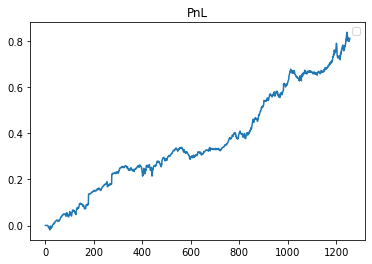

In [20]:
import matplotlib.pyplot as plt
pnls, turnovers, sharpe_ratios, A = create_alpha()
pnls_cumsum = np.cumsum(pnls)
plt.title('PnL')
    
plt.plot(np.cumsum(pnls))
sharpe_ratios_year = []
turnover_years = []
pnl_years = []
for i in range(5):
    sharpe_ratio = np.array(pnls[i * T + n: (i+1) * T+n]).mean() / np.array(pnls[i * T + n: (i+1) * T + n]).std() * (T**0.5)
    sharpe_ratios_year.append(sharpe_ratio)
    
    turnover_year = np.mean(turnovers[i*T +n: (i+1) * T + n])
    turnover_years.append(turnover_year)
    
    pnl_year = pnls_cumsum[min((i+1)*T + n, 1256) ] - pnls_cumsum[i* T + n]
    pnl_years.append(pnl_year)
    
print(f" sharp is {(sharpe_ratios_year)}")
print(f" turnovers is {(turnover_years)}")
print(f" pnls is {(pnl_years)}")



plt.legend()
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.80it/s]


 sharp is [2.4083880501665598, 1.6187092489547203, 1.8087291900115692, 3.6727334451684763, 1.5169326404159522]
 turnovers is [33.122568616082376, 33.724854169660105, 31.792706713341023, 2.2493386234489736, 30.802390268913108]
 pnls is [0.17064148511702273, 0.13362060016345445, 0.07854398302331467, 0.28546796044955247, 0.14448990835730713]


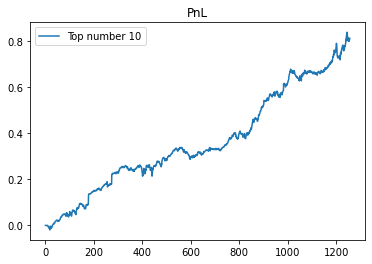

In [400]:
pnls, turnovers, sharpe_ratios, A = create_alpha()
pnls_cumsum = np.cumsum(pnls)
plt.title('PnL')
    
plt.plot(np.cumsum(pnls), label=f'Top number {TOP_NUMBER}')
sharpe_ratios_year = []
turnover_years = []
pnl_years = []
for i in range(5):
    sharpe_ratio = np.array(pnls[i * T + n: (i+1) * T+n]).mean() / np.array(pnls[i * T + n: (i+1) * T + n]).std() * (T**0.5)
    sharpe_ratios_year.append(sharpe_ratio)
    
    turnover_year = np.mean(turnovers[i*T +n: (i+1) * T + n])
    turnover_years.append(turnover_year)
    
    pnl_year = pnls_cumsum[min((i+1)*T + n, 1256) ] - pnls_cumsum[i* T + n]
    pnl_years.append(pnl_year)
    
print(f" sharp is {(sharpe_ratios_year)}")
print(f" turnovers is {(turnover_years)}")
print(f" pnls is {(pnl_years)}")



plt.legend()
plt.show()

In [344]:
# plt.title('PnL')
for Q1_TOP_NUMBER in (10, 50, 100, 200, 300, 500):
    for Q2_TOP_NUMBER in (10, 50, 100, 200, 300, 500):
        for Q1_DECAY_STEP in (2, 3, 4):
            for C2 in (0.5, 0.6, 0.7, 0.8, 0.9):
                pnls, turnovers, sharpe_ratios, A = create_alpha()

#                 plt.plot(np.cumsum(pnls), label=f'Top number {TOP_NUMBER}')
                sharpe_ratios_year = []
                turnover_years = []
                for i in range(5):
                    sharpe_ratio = np.array(pnls[i * T + n: (i+1) * T+n]).mean() / np.array(pnls[i * T + n: (i+1) * T + n]).std() * (T**0.5)
                    sharpe_ratios_year.append(sharpe_ratio)

                    turnover_year = np.mean(turnovers[i*T +n: (i+1) * T + n])
                    turnover_years.append(turnover_year)
                print(f"For Q1_TOP_NUMBER {Q1_TOP_NUMBER} Q2_TOP_NUMBER {Q2_TOP_NUMBER} Q1_DECAY_STEP {Q1_DECAY_STEP} C2 {C2} sharp is {(sharpe_ratios_year)}")
                print(f"For Q1_TOP_NUMBER {Q1_TOP_NUMBER} Q2_TOP_NUMBER {Q2_TOP_NUMBER} Q1_DECAY_STEP {Q1_DECAY_STEP} C2 {C2} turnovers is {(turnover_years)}")

# plt.legend()
# plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 235.23it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.3895556344886297, 1.6187092489547203, 1.8087291900115692, 3.6554072820467645, 1.5591301688213044]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12216787316415, 33.724854169660105, 31.792706713341023, 3.0275299097763577, 76.0935315959295]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 236.46it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.411255961619665, 1.6187092489547203, 1.8087291900115692, 3.6005711167966163, 1.5273563493111817]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12742623778316, 33.724854169660105, 31.792706713341023, 2.5553630490768913, 48.22739178105395]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 218.65it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.437876007886045, 1.6187092489547203, 1.8087291900115692, 3.5634693439764815, 1.4460042084749247]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13645897484801, 33.724854169660105, 31.792706713341023, 2.241826550692632, 28.203018988712103]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 194.55it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4329400027865797, 1.6187092489547203, 1.8087291900115692, 3.5364188804022745, 1.3583375689536037]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12743010608605, 33.724854169660105, 31.792706713341023, 2.0278792510059356, 15.729103285471831]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 198.93it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4398321791609234, 1.6187092489547203, 1.8087291900115692, 3.5172916252842015, 1.2846042896148548]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.134011942361184, 33.724854169660105, 31.792706713341023, 1.8785635755235934, 7.874382537480113]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 184.72it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.414611569722506, 1.6187092489547201, 1.8087291900115692, 3.5916869124331066, 1.5889244592550757]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.135249741439296, 33.724854169660105, 31.792706713341023, 2.9218532439603977, 75.66065829329625]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:07<00:00, 170.19it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4041202185517956, 1.6187092489547203, 1.8087291900115692, 3.5620611517343326, 1.5106893986071035]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12526576068733, 33.724854169660105, 31.792706713341023, 2.514689796020365, 45.02591116117267]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 181.25it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.406998187384411, 1.6187092489547201, 1.8087291900115692, 3.5432123546658625, 1.410025568072898]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.136106234829874, 33.724854169660105, 31.792706713341023, 2.2098345123249907, 25.466505414303185]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 213.32it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4175110877598143, 1.6187092489547203, 1.8087291900115692, 3.5263197464699325, 1.3300487473187175]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.13443149865055, 33.724854169660105, 31.792706713341023, 2.0110431439887266, 14.053479018407902]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 216.02it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4191272201449103, 1.6187092489547203, 1.8087291900115692, 3.5131588185985416, 1.2709400020140333]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12342448507588, 33.724854169660105, 31.792706713341023, 1.874219051293683, 7.154487723408679]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 236.23it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.3948485466417573, 1.6187092489547203, 1.8087291900115692, 3.5901044918238187, 1.6094227275937794]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.121161724245546, 33.724854169660105, 31.792706713341023, 2.8227961658157485, 74.85525308036993]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.93it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4283391621819517, 1.6187092489547203, 1.8087291900115692, 3.5656783109542793, 1.48236103233102]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13362267955553, 33.724854169660105, 31.792706713341023, 2.4217971202166155, 42.32160293881789]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.95it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.409203695265523, 1.6187092489547203, 1.8087291900115692, 3.543080026923345, 1.3792711413214866]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12703009195823, 33.724854169660105, 31.792706713341023, 2.171202693338453, 23.2293786575964]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.42it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4232633921896376, 1.6187092489547201, 1.8087291900115692, 3.523707020634213, 1.3113725946580361]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.128699517822355, 33.724854169660105, 31.792706713341023, 1.9956851717261828, 12.799432416526578]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 233.21it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4099579812425027, 1.6187092489547201, 1.8087291900115692, 3.510945535271246, 1.2627182940578636]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12974199457113, 33.724854169660105, 31.792706713341023, 1.8705883997820338, 6.632688819171542]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.85it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.3993884148232745, 1.6187092489547203, 1.8087291900115692, 3.4711231628714465, 1.324675061425665]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.1210186632154, 33.724854169660105, 31.792706713341023, 3.137362779245869, 75.93839719207294]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.75it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.40548838655936, 1.6187092489547203, 1.8087291900115692, 3.343499276658542, 1.1878335230597523]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.11675583192352, 33.724854169660105, 31.792706713341023, 2.641902972541042, 47.77362581582899]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.56it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.407548263190053, 1.6187092489547203, 1.8087291900115692, 3.235437114133284, 1.0181561867999929]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13086424959853, 33.724854169660105, 31.792706713341023, 2.3102353551748536, 27.635125699024343]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.60it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.394010274525624, 1.6187092489547203, 1.8087291900115692, 3.1508668012049657, 0.8751379363041055]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12578892956101, 33.724854169660105, 31.792706713341023, 2.08765366276382, 14.941470642255645]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.66it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.406192163341194, 1.6187092489547203, 1.8087291900115692, 3.084313627669565, 0.7681412426009873]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12281423414189, 33.724854169660105, 31.792706713341023, 1.9352714098819788, 7.003580142425048]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.25it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4385010018423294, 1.6187092489547203, 1.8087291900115692, 3.4132751070053104, 1.4040209815924873]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.132479737947214, 33.724854169660105, 31.792706713341023, 3.0271351106509985, 75.66261851413122]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 230.47it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.412288440170886, 1.6187092489547201, 1.8087291900115692, 3.307230099454405, 1.2074017233234156]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12018938348378, 33.724854169660105, 31.792706713341023, 2.602837498896529, 44.672706899027055]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.73it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4049707442490798, 1.6187092489547203, 1.8087291900115692, 3.216387939275645, 1.0025670944111407]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12986588282052, 33.724854169660105, 31.792706713341023, 2.2874543961949785, 24.790896766549107]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.40it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4194286138308607, 1.6187092489547203, 1.8087291900115692, 3.142170670416868, 0.8580536869066102]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.11973306686633, 33.724854169660105, 31.792706713341023, 2.070093144460316, 13.151611069188592]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.25it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4409717418548658, 1.6187092489547201, 1.8087291900115692, 3.0811421530022858, 0.759181407503452]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.14624184031485, 33.724854169660105, 31.792706713341023, 1.930198518918765, 6.237698794189295]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.25it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.410733835170352, 1.6187092489547203, 1.8087291900115692, 3.412705288057906, 1.488480732619522]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12991599226207, 33.724854169660105, 31.792706713341023, 2.9609417309783423, 75.13541744546173]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.62it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4096766082137555, 1.6187092489547201, 1.8087291900115692, 3.3146917002370206, 1.213455684123097]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.129776422576846, 33.724854169660105, 31.792706713341023, 2.539232934620434, 41.904845408392376]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.73it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3988359053916284, 1.6187092489547201, 1.8087291900115692, 3.2219303421630814, 0.9880959323077636]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.13205512073819, 33.724854169660105, 31.792706713341023, 2.2614908905739637, 22.400517097966343]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.41it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.397450946879014, 1.6187092489547201, 1.8087291900115692, 3.14422526418805, 0.845458935402515]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.124729983520254, 33.724854169660105, 31.792706713341023, 2.063873700361656, 11.794005585289339]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.39it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4199202658810126, 1.6187092489547201, 1.8087291900115692, 3.081422599229108, 0.7530100385271873]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.135145074151325, 33.724854169660105, 31.792706713341023, 1.9278177764321303, 5.676900749388864]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.40it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4159325905937066, 1.6187092489547201, 1.8087291900115692, 3.5169638444329236, 1.5944631522309851]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12939483438421, 33.724854169660105, 31.792706713341023, 3.1269761662857216, 75.61648941394655]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 233.12it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4362998646445417, 1.6187092489547203, 1.8087291900115692, 3.404048851248215, 1.5284268986262377]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13526639235685, 33.724854169660105, 31.792706713341023, 2.6162103366141407, 47.20556191072588]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.65it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4175936179430115, 1.6187092489547203, 1.8087291900115692, 3.31681387123639, 1.398615183393123]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13474408761474, 33.724854169660105, 31.792706713341023, 2.27702061338135, 27.04980879823169]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.71it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4169927349725198, 1.6187092489547201, 1.8087291900115692, 3.249348015461996, 1.274240044814266]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.126575400772246, 33.724854169660105, 31.792706713341023, 2.0632802228254077, 14.720097522715646]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.84it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3823283618619446, 1.6187092489547203, 1.8087291900115692, 3.2032587034191113, 1.175991327538033]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.11542728216906, 33.724854169660105, 31.792706713341023, 1.9006840070624873, 6.753615858321852]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.90it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3895745251471605, 1.6187092489547201, 1.8087291900115692, 3.460170953566232, 1.7066815697720175]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12494464893353, 33.724854169660105, 31.792706713341023, 3.0439847864280445, 75.2966977099102]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.06it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4000158437714987, 1.6187092489547201, 1.8087291900115692, 3.3690568205525073, 1.565181125526419]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12042454243251, 33.724854169660105, 31.792706713341023, 2.583286990854689, 44.08080683428514]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.50it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4089145910937098, 1.6187092489547203, 1.8087291900115692, 3.301324575499398, 1.3896154804746943]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.13586626025135, 33.724854169660105, 31.792706713341023, 2.277551706768944, 24.248270511344167]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.25it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4038957661595646, 1.6187092489547201, 1.8087291900115692, 3.2444249177536304, 1.257738444422949]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.121486412229835, 33.724854169660105, 31.792706713341023, 2.0658449458131676, 12.958109756174034]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.25it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4215645466677085, 1.6187092489547201, 1.8087291900115692, 3.2022672462206456, 1.1662799139089042]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12771683609391, 33.724854169660105, 31.792706713341023, 1.9056408292433669, 5.956465945453027]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.28it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.3954584977933533, 1.6187092489547203, 1.8087291900115692, 3.4471119982763905, 1.7900302604982075]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13389747977033, 33.724854169660105, 31.792706713341023, 2.9964998842544057, 74.81227318742114]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.20it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.42903652786391, 1.6187092489547203, 1.8087291900115692, 3.3747734969527614, 1.572070411467719]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.1270519130854, 33.724854169660105, 31.792706713341023, 2.546939264119287, 41.31869570053605]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.11it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.414843342461306, 1.6187092489547203, 1.8087291900115692, 3.306757473411647, 1.3701986396831396]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12499207166703, 33.724854169660105, 31.792706713341023, 2.277755381830811, 21.900162338717752]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.99it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3919775383732427, 1.6187092489547203, 1.8087291900115692, 3.2490296667801712, 1.2428120884122198]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11247970120133, 33.724854169660105, 31.792706713341023, 2.0758452699547565, 11.567710583976202]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.11it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.391794641285302, 1.6187092489547203, 1.8087291900115692, 3.2039823434026817, 1.1586052391183799]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12211969067096, 33.724854169660105, 31.792706713341023, 1.9146237312971988, 5.374437816258039]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.52it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.40809497853974, 1.6187092489547203, 1.8087291900115692, 3.5685617199946433, 1.4813294616204928]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12488003434326, 33.724854169660105, 31.792706713341023, 3.1646760513928776, 74.99577007453755]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.80it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3954096042315514, 1.6187092489547203, 1.8087291900115692, 3.4694479782724885, 1.384127889186301]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13077965147639, 33.724854169660105, 31.792706713341023, 2.656837593036294, 46.38455364287625]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.85it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4145301653155156, 1.6187092489547203, 1.8087291900115692, 3.4002972482532257, 1.2334370655587277]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.1254507569345, 33.724854169660105, 31.792706713341023, 2.3074354377994437, 26.142247239613006]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.85it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.401293203318216, 1.6187092489547201, 1.8087291900115692, 3.349743088661955, 1.0993628837019658]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13838355768322, 33.724854169660105, 31.792706713341023, 2.07815658143861, 13.77471223790901]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.76it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.430406317756541, 1.6187092489547201, 1.8087291900115692, 3.3103503822894504, 0.9969526535319505]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12909153234877, 33.724854169660105, 31.792706713341023, 1.9216574629987055, 6.2101851543957]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.55it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3960504877043425, 1.6187092489547203, 1.8087291900115692, 3.523499768103338, 1.5721912006538052]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12841347380316, 33.724854169660105, 31.792706713341023, 3.147415618438814, 74.88791346534057]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.06it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.3968430572791464, 1.6187092489547203, 1.8087291900115692, 3.4440912582646077, 1.4048540314515485]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.126867170510366, 33.724854169660105, 31.792706713341023, 2.6328993568814063, 43.24880117448377]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.44it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.414292979739387, 1.6187092489547201, 1.8087291900115692, 3.3936923931381573, 1.2155488443606868]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12836079418624, 33.724854169660105, 31.792706713341023, 2.3454903839825256, 23.29419547006106]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.27it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4103550661854416, 1.6187092489547203, 1.8087291900115692, 3.3518799989734482, 1.0788640916743422]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.129242081047956, 33.724854169660105, 31.792706713341023, 2.1437661990334202, 12.027728715997943]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.52it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.389757233264305, 1.6187092489547201, 1.8087291900115692, 3.315296310051345, 0.9863488770214537]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.126968569866555, 33.724854169660105, 31.792706713341023, 1.9634743851093026, 5.38122213187563]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 231.32it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.397193994694981, 1.6187092489547203, 1.8087291900115692, 3.485548236720727, 1.6554859216502213]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12309422556495, 33.724854169660105, 31.792706713341023, 3.0667191497048334, 74.4577875833618]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.27it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.420679714793489, 1.6187092489547203, 1.8087291900115692, 3.427495481943051, 1.4044220519119728]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12737395924414, 33.724854169660105, 31.792706713341023, 2.541922211299188, 40.39988484262666]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 236.59it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4151420384640896, 1.6187092489547201, 1.8087291900115692, 3.3845423687670664, 1.1930811616947024]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.1254846469388, 33.724854169660105, 31.792706713341023, 2.2425255674698135, 20.92110952752259]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.35it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.402144131684897, 1.6187092489547203, 1.8087291900115692, 3.3455959067684162, 1.0614533620250786]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11950180972355, 33.724854169660105, 31.792706713341023, 2.0564449875587534, 10.690452516675476]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.06it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.413902922183445, 1.6187092489547203, 1.8087291900115692, 3.3124069233057885, 0.9784107916845233]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.13362669767404, 33.724854169660105, 31.792706713341023, 1.913642713479509, 4.778248617320664]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.15it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4010815884711105, 1.6187092489547201, 1.8087291900115692, 3.6094457678872356, 1.508590964919849]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12100253720355, 33.724854169660105, 31.792706713341023, 3.281821188078484, 74.82263995817243]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.68it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.410792114145958, 1.6187092489547201, 1.8087291900115692, 3.5237728878358996, 1.4312277556347337]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13068926489779, 33.724854169660105, 31.792706713341023, 2.6830661523680583, 46.175853019067304]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.75it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.405387273390734, 1.6187092489547201, 1.8087291900115692, 3.466523193118869, 1.2895224089689772]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12919805383911, 33.724854169660105, 31.792706713341023, 2.298599711283637, 25.83765437253552]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.01it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.439906565329959, 1.6187092489547203, 1.8087291900115692, 3.4258737829816583, 1.1536012615755282]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13512273634205, 33.724854169660105, 31.792706713341023, 2.0619094422966846, 13.445506898412173]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.20it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4096286971754868, 1.6187092489547203, 1.8087291900115692, 3.3939203220374643, 1.0453414710445994]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12548139503756, 33.724854169660105, 31.792706713341023, 1.9086469150203187, 5.895786417547719]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.00it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.421776951128722, 1.6187092489547203, 1.8087291900115692, 3.5550470690417337, 1.608528807706434]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12346662444822, 33.724854169660105, 31.792706713341023, 3.1827461640524595, 74.73650985985368]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.90it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4036939490710174, 1.6187092489547203, 1.8087291900115692, 3.4881177884481516, 1.4584273565988766]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.124956068934395, 33.724854169660105, 31.792706713341023, 2.6008151969242106, 43.01130485175519]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.11it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.3979681373970263, 1.6187092489547201, 1.8087291900115692, 3.4488334748719587, 1.2737010545368717]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12541128778864, 33.724854169660105, 31.792706713341023, 2.258226546158484, 22.958495538063776]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.30it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4277992968902335, 1.6187092489547203, 1.8087291900115692, 3.4176391403045545, 1.1327773093910631]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12488325876314, 33.724854169660105, 31.792706713341023, 2.043032637742952, 11.678816990032757]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.74it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4088764368324167, 1.6187092489547203, 1.8087291900115692, 3.390890023493662, 1.0338545544140751]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12195998509316, 33.724854169660105, 31.792706713341023, 1.9011199112686343, 5.136927905659835]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.03it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.411099341203706, 1.6187092489547201, 1.8087291900115692, 3.51909214463963, 1.6947962305737014]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12985283101624, 33.724854169660105, 31.792706713341023, 3.158347523697841, 74.39220032449586]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.60it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4187423704502877, 1.6187092489547203, 1.8087291900115692, 3.473944099133212, 1.4637041786663503]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13186945492577, 33.724854169660105, 31.792706713341023, 2.5604951752157286, 40.14864030876105]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.60it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4234758052196437, 1.6187092489547203, 1.8087291900115692, 3.442204858086835, 1.2507387298978907]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.13115198508182, 33.724854169660105, 31.792706713341023, 2.2324788866963083, 20.589398629895758]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.42it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4072791822056145, 1.6187092489547203, 1.8087291900115692, 3.4141503803651396, 1.11457686248359]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12492006424642, 33.724854169660105, 31.792706713341023, 2.030823153715593, 10.337910463505063]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.64it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.3948095476729008, 1.6187092489547203, 1.8087291900115692, 3.389577305618008, 1.0251021557409505]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.117598147975556, 33.724854169660105, 31.792706713341023, 1.8926379980813923, 4.580810974626599]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.80it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4203083147754865, 1.6187092489547203, 1.8087291900115692, 3.648499591801893, 1.5554313310976227]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12831328768994, 33.724854169660105, 31.792706713341023, 3.3813737248557985, 74.75499817369355]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.60it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3950622760248783, 1.6187092489547203, 1.8087291900115692, 3.5761601376914416, 1.478564707396114]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12676791162222, 33.724854169660105, 31.792706713341023, 2.7442669440712737, 46.116700885759684]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.66it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.432294752296302, 1.6187092489547201, 1.8087291900115692, 3.53177018263158, 1.3127399073527874]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12738281759349, 33.724854169660105, 31.792706713341023, 2.328906285262819, 25.781480183708645]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.30it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4200311617360075, 1.6187092489547203, 1.8087291900115692, 3.5024352896585786, 1.1464299923442172]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.128199826024165, 33.724854169660105, 31.792706713341023, 2.0652415641297104, 13.360747096818882]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.68it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4011215262215, 1.6187092489547201, 1.8087291900115692, 3.4806540851094456, 1.0150775813029251]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12475497948529, 33.724854169660105, 31.792706713341023, 1.9029963961985712, 5.77410623797532]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.44it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3994609141925944, 1.6187092489547203, 1.8087291900115692, 3.5891581785618714, 1.6632679284320606]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12737892507956, 33.724854169660105, 31.792706713341023, 3.20699637272379, 74.68167757529879]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.17it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4243841336584357, 1.6187092489547201, 1.8087291900115692, 3.5367418261107506, 1.4895336756083775]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11963060973891, 33.724854169660105, 31.792706713341023, 2.602894119005848, 42.96065987203666]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 262.09it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4021295343439153, 1.6187092489547201, 1.8087291900115692, 3.5108868189856572, 1.2557357775788403]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.11679437344967, 33.724854169660105, 31.792706713341023, 2.2503841249065446, 22.913735816736942]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 239.34it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4031989778481297, 1.6187092489547201, 1.8087291900115692, 3.4917113976820904, 1.0897800062630048]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.120417029178775, 33.724854169660105, 31.792706713341023, 2.0298036444698657, 11.580721630006101]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.40it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4350334244368836, 1.6187092489547201, 1.8087291900115692, 3.4762521509798274, 0.9854844957810147]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12896716521419, 33.724854169660105, 31.792706713341023, 1.8901487187151003, 5.018892047646294]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.07it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4431084363402675, 1.6187092489547203, 1.8087291900115692, 3.552726669121922, 1.7264069384719485]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12988900544794, 33.724854169660105, 31.792706713341023, 3.222174822378617, 74.44288949466943]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.85it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4241638636690164, 1.6187092489547203, 1.8087291900115692, 3.5222695853651462, 1.4375062878689262]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.130654489238175, 33.724854169660105, 31.792706713341023, 2.5917816900435735, 40.184433511294614]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.01it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.404329807033582, 1.6187092489547201, 1.8087291900115692, 3.5038760231117787, 1.1712232914411824]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12099948923834, 33.724854169660105, 31.792706713341023, 2.248015857406676, 20.54370426236389]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.12it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.402855068535695, 1.6187092489547203, 1.8087291900115692, 3.4880721415438276, 1.031353513051844]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11926335553186, 33.724854169660105, 31.792706713341023, 2.0367080103427444, 10.240706850128651]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.44it/s]


For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.41775100580855, 1.6187092489547203, 1.8087291900115692, 3.4746501373049057, 0.9590577528286259]
For Q1_TOP_NUMBER 10 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.131367236251535, 33.724854169660105, 31.792706713341023, 1.8941362668616157, 4.463925348544095]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 258.86it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4163656264895663, 1.6187092489547203, 1.8087291900115692, 3.5294115473591394, 1.063530776240676]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.13005960141594, 33.724854169660105, 31.792706713341023, 3.044377835716325, 71.73143315782836]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.16it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.392790463090775, 1.6187092489547201, 1.8087291900115692, 3.5229426914965036, 1.1547274980882198]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.11579778335793, 33.724854169660105, 31.792706713341023, 2.5668291305535162, 44.099573876222635]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.25it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.38775997590223, 1.6187092489547201, 1.8087291900115692, 3.5167650021710832, 1.1961050736106593]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12472933771629, 33.724854169660105, 31.792706713341023, 2.250847238569842, 25.340779696249]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.01it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4177236326532423, 1.6187092489547203, 1.8087291900115692, 3.5108272504323677, 1.2147045773354548]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.129505135591, 33.724854169660105, 31.792706713341023, 2.03746546829993, 14.124307853584353]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.37it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4151471098727084, 1.6187092489547203, 1.8087291900115692, 3.5062839818579556, 1.2227266258829932]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12749829107542, 33.724854169660105, 31.792706713341023, 1.8864948378139361, 7.208964461658469]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.41it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4012057381690473, 1.6187092489547201, 1.8087291900115692, 3.5215554143624668, 0.9256042843479888]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12319398709631, 33.724854169660105, 31.792706713341023, 2.93066398041385, 72.65862934740026]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.89it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.3880839067331707, 1.6187092489547203, 1.8087291900115692, 3.5171595055497495, 1.0986330065079681]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.124078694068224, 33.724854169660105, 31.792706713341023, 2.523132167377771, 41.403680178718425]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.27it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.3934741538522335, 1.6187092489547203, 1.8087291900115692, 3.51056902464508, 1.1718623099079875]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.130202448926, 33.724854169660105, 31.792706713341023, 2.223673065221539, 22.993321480470623]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.87it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.421898367740031, 1.6187092489547203, 1.8087291900115692, 3.5060223968616295, 1.2037783455620454]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12773778599372, 33.724854169660105, 31.792706713341023, 2.0234594707736333, 12.704946353395107]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.40it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4157730212257102, 1.6187092489547201, 1.8087291900115692, 3.5038970728234995, 1.2187465159790947]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.129476696740184, 33.724854169660105, 31.792706713341023, 1.8817193836448203, 6.602891540191002]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.00it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4290989599697492, 1.6187092489547201, 1.8087291900115692, 3.522985658150376, 0.8773526052884799]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13479379188159, 33.724854169660105, 31.792706713341023, 2.866590763646255, 72.8630207804531]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.39it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3748003899206265, 1.6187092489547203, 1.8087291900115692, 3.5132949815962395, 1.084453600450826]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12711050471774, 33.724854169660105, 31.792706713341023, 2.4470572667696744, 39.066295261442235]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.30it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.390983853218754, 1.6187092489547203, 1.8087291900115692, 3.506444849386857, 1.1660855529525214]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.13280422771212, 33.724854169660105, 31.792706713341023, 2.189369490103667, 21.050834471589503]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.02it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4295797698065686, 1.6187092489547201, 1.8087291900115692, 3.503019418219961, 1.201611701140491]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12120485608884, 33.724854169660105, 31.792706713341023, 2.0108330295842, 11.638227305797084]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.06it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4285334640662053, 1.6187092489547201, 1.8087291900115692, 3.5023251542017717, 1.2180220102672237]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.1335880458094, 33.724854169660105, 31.792706713341023, 1.8779139165708307, 6.162827841608081]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.64it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.3862614296183584, 1.6187092489547201, 1.8087291900115692, 3.305398184705596, 0.7124330579833456]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12929206394811, 33.724854169660105, 31.792706713341023, 3.2124062413998677, 73.96958756752528]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.09it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4114484704423886, 1.6187092489547201, 1.8087291900115692, 3.2314064534495324, 0.7477286902297053]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12404813363429, 33.724854169660105, 31.792706713341023, 2.6600573175244966, 44.446494836665195]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.87it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.3943125126884888, 1.6187092489547203, 1.8087291900115692, 3.1678586884299946, 0.7429320635632316]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.125360015273664, 33.724854169660105, 31.792706713341023, 2.307828962234735, 24.714796141416585]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.73it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4114208891125894, 1.6187092489547203, 1.8087291900115692, 3.1140417878633957, 0.7254264331347093]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12097689846652, 33.724854169660105, 31.792706713341023, 2.0882599344235255, 13.223531433824112]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.55it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.413295485540274, 1.6187092489547203, 1.8087291900115692, 3.068817740227511, 0.7066976267689554]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12096211156696, 33.724854169660105, 31.792706713341023, 1.938098455494723, 6.292033020437808]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.65it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4170001006325883, 1.6187092489547203, 1.8087291900115692, 3.2956375784233023, 0.6310520513491824]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12742306036157, 33.724854169660105, 31.792706713341023, 3.0957407947405082, 75.12822450414063]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.55it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4132325228746834, 1.6187092489547203, 1.8087291900115692, 3.2266491710686203, 0.7393337641927185]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.124166722576334, 33.724854169660105, 31.792706713341023, 2.6075334233324634, 41.381445514073974]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.92it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.388473326517429, 1.6187092489547203, 1.8087291900115692, 3.16318948798748, 0.7441496016640445]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.125059155461244, 33.724854169660105, 31.792706713341023, 2.279461199676638, 22.06293685729799]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.87it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.3723623476994993, 1.6187092489547201, 1.8087291900115692, 3.110786280268146, 0.7263629062106013]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12512345570705, 33.724854169660105, 31.792706713341023, 2.0707754141436165, 11.650053424966151]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.89it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.3679520178198823, 1.6187092489547203, 1.8087291900115692, 3.067405873487555, 0.7068489447851504]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.120462094133416, 33.724854169660105, 31.792706713341023, 1.9327994655264478, 5.625529692306515]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.09it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4186715083393735, 1.6187092489547201, 1.8087291900115692, 3.3047204619141612, 0.6550624916636403]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.1283080128375, 33.724854169660105, 31.792706713341023, 3.051608637569066, 75.47366439878455]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.71it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3916363162115806, 1.6187092489547201, 1.8087291900115692, 3.2297479513818446, 0.765416314646687]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12822125191717, 33.724854169660105, 31.792706713341023, 2.5494167276203097, 38.628148971688745]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.93it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4183038579140907, 1.6187092489547201, 1.8087291900115692, 3.1648915772085586, 0.7555825926457093]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12588495415485, 33.724854169660105, 31.792706713341023, 2.257276476290348, 19.885750074994807]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3920501551486204, 1.6187092489547201, 1.8087291900115692, 3.111632474357714, 0.730272830235413]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.1268640741452, 33.724854169660105, 31.792706713341023, 2.065016805973018, 10.466043953034289]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.27it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4094105032175146, 1.6187092489547201, 1.8087291900115692, 3.0679933991863173, 0.7077610883508527]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.1287504781778, 33.724854169660105, 31.792706713341023, 1.9281109712296471, 5.142965984244343]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.95it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4047694192881477, 1.6187092489547203, 1.8087291900115692, 3.352773647555427, 1.0583918496030247]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12144155257225, 33.724854169660105, 31.792706713341023, 3.269630722404344, 74.84566141130757]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.84it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4043866354068917, 1.6187092489547203, 1.8087291900115692, 3.291528261879759, 1.1376600910077443]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13267785531779, 33.724854169660105, 31.792706713341023, 2.6929794733147148, 45.049551413880934]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.28it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.399962987799167, 1.6187092489547203, 1.8087291900115692, 3.250184286931276, 1.1487454130583126]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.124571405737306, 33.724854169660105, 31.792706713341023, 2.29588705630293, 24.69334256640249]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.32it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4128308540525594, 1.6187092489547203, 1.8087291900115692, 3.217350005008903, 1.1346798023780118]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12599424541033, 33.724854169660105, 31.792706713341023, 2.0519776412784068, 12.975372266778665]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.51it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3981855473583686, 1.6187092489547203, 1.8087291900115692, 3.190116379942234, 1.1169296595876648]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.1285121147276, 33.724854169660105, 31.792706713341023, 1.8974152459446936, 5.974400562431086]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.27it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.414842875156286, 1.6187092489547203, 1.8087291900115692, 3.33971914470755, 0.9959089830341028]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.13180238846233, 33.724854169660105, 31.792706713341023, 3.176416730379588, 76.46833783640548]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.75it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.391610202572462, 1.6187092489547201, 1.8087291900115692, 3.287436178715268, 1.1408390292709416]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11654470588875, 33.724854169660105, 31.792706713341023, 2.6426705237638366, 42.12946794572021]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.35it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4202372949267836, 1.6187092489547203, 1.8087291900115692, 3.248137047763224, 1.1520425716649416]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.128478593293046, 33.724854169660105, 31.792706713341023, 2.28635742796164, 22.05600197256806]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.86it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.444363882519195, 1.6187092489547203, 1.8087291900115692, 3.2160474530723873, 1.1345674393449598]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12198574879565, 33.724854169660105, 31.792706713341023, 2.055909744521717, 11.410595717175356]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.50it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.412711349041836, 1.6187092489547201, 1.8087291900115692, 3.189497247804293, 1.1160862762531543]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.121072571239985, 33.724854169660105, 31.792706713341023, 1.9021039176568764, 5.312688484063818]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.29it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.3751834162588707, 1.6187092489547203, 1.8087291900115692, 3.3469104256598885, 1.0200354677549628]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12898195738801, 33.724854169660105, 31.792706713341023, 3.14681783419356, 77.15903121447185]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.35it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.42732898079162, 1.6187092489547203, 1.8087291900115692, 3.29148281848585, 1.1648985257562716]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12823665955208, 33.724854169660105, 31.792706713341023, 2.5986122554985362, 39.31117611295317]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.35it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.412259688393096, 1.6187092489547203, 1.8087291900115692, 3.250387540924086, 1.1576410856641057]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12296085512132, 33.724854169660105, 31.792706713341023, 2.2782241934930507, 19.805284577922812]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.12it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4200379674230623, 1.6187092489547201, 1.8087291900115692, 3.2170121984617635, 1.1345483836687147]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.131184435308974, 33.724854169660105, 31.792706713341023, 2.0663322490799025, 10.17776745881627]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.55it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4231189514319107, 1.6187092489547201, 1.8087291900115692, 3.190016149294946, 1.11520675560654]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12548685930027, 33.724854169660105, 31.792706713341023, 1.9097044788352142, 4.808507834176748]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.02it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4162071701131986, 1.6187092489547203, 1.8087291900115692, 3.398991633618806, 0.8999784904306342]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12062445984041, 33.724854169660105, 31.792706713341023, 3.291913322855169, 74.7297213919872]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.90it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3911496529223086, 1.6187092489547203, 1.8087291900115692, 3.35629450478135, 0.9655988384826362]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.122884476626076, 33.724854169660105, 31.792706713341023, 2.746717822858016, 44.976026182694525]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.52it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4063641926028043, 1.6187092489547201, 1.8087291900115692, 3.3281461921293, 0.9744416050094268]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.122402516548995, 33.724854169660105, 31.792706713341023, 2.347430698984097, 24.54471525217583]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.50it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4104082121974644, 1.6187092489547203, 1.8087291900115692, 3.311927314540187, 0.9578906514515411]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12677486274116, 33.724854169660105, 31.792706713341023, 2.0794022278244175, 12.473200394885083]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.59it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3965915627547205, 1.6187092489547201, 1.8087291900115692, 3.298663614051822, 0.9390089697282172]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12694000449197, 33.724854169660105, 31.792706713341023, 1.9110005829665655, 5.381213921513938]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.60it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.402637919734361, 1.6187092489547203, 1.8087291900115692, 3.383370734547486, 0.8146576552075291]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12531933162707, 33.724854169660105, 31.792706713341023, 3.289783133408904, 76.48800613044185]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.05it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.429798728374175, 1.6187092489547201, 1.8087291900115692, 3.348681832686836, 0.9538191905289355]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.133725922103444, 33.724854169660105, 31.792706713341023, 2.734351349166109, 42.36423405367921]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.63it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.399266143392664, 1.6187092489547203, 1.8087291900115692, 3.324764070532183, 0.9720231449770068]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12820053268966, 33.724854169660105, 31.792706713341023, 2.3807360811180915, 21.786559257321034]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.86it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.3989389537522547, 1.6187092489547201, 1.8087291900115692, 3.3098251058507073, 0.954792277384636]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.130121802543165, 33.724854169660105, 31.792706713341023, 2.1240865988721502, 10.841984652137912]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 239.98it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.40243762603672, 1.6187092489547203, 1.8087291900115692, 3.29775202212158, 0.9371935189713235]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12498830624224, 33.724854169660105, 31.792706713341023, 1.943002079732144, 4.69715120195919]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.23it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.3914606089141257, 1.6187092489547203, 1.8087291900115692, 3.383737774030129, 0.8268802475848822]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.1232430025258, 33.724854169660105, 31.792706713341023, 3.1973423040132967, 77.8736849754281]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.06it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3734089824156497, 1.6187092489547203, 1.8087291900115692, 3.3503208468462726, 0.9729513903392124]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.1171619864588, 33.724854169660105, 31.792706713341023, 2.609118225124542, 39.743154967775254]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.79it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4203175231985306, 1.6187092489547201, 1.8087291900115692, 3.326271129945644, 0.9751473443756392]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.133859479821105, 33.724854169660105, 31.792706713341023, 2.2596108331816436, 19.497795837539357]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.16it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4223746496726024, 1.6187092489547203, 1.8087291900115692, 3.3110366484123688, 0.9537493131665288]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.13424612753268, 33.724854169660105, 31.792706713341023, 2.046411046438845, 9.605983054387938]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.32it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.422180120037629, 1.6187092489547201, 1.8087291900115692, 3.298152301961274, 0.9360425100940493]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12467837044361, 33.724854169660105, 31.792706713341023, 1.9060534571728345, 4.19600764810443]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 232.03it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4169420076915173, 1.6187092489547201, 1.8087291900115692, 3.4475648595044794, 0.934033067217334]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.125099773319775, 33.724854169660105, 31.792706713341023, 3.3948986196060513, 75.15036096814788]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.22it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4175284927535885, 1.6187092489547203, 1.8087291900115692, 3.4176680609206977, 1.0110567822417458]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.125076094133966, 33.724854169660105, 31.792706713341023, 2.7780692917133427, 45.016130395410094]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 258.80it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.401823090581648, 1.6187092489547201, 1.8087291900115692, 3.3986589628166146, 1.0218018033828313]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.124054776894084, 33.724854169660105, 31.792706713341023, 2.3549216657627583, 24.5098650011693]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.07it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.3887645877327794, 1.6187092489547201, 1.8087291900115692, 3.386749352863793, 1.0071444161209653]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12328407308647, 33.724854169660105, 31.792706713341023, 2.08195590265888, 12.467308949052775]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.18it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.450478575095119, 1.6187092489547201, 1.8087291900115692, 3.379801600766492, 0.9844386942276621]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.14326139880407, 33.724854169660105, 31.792706713341023, 1.9045029611467017, 5.235759501008614]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.09it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4299401140163934, 1.6187092489547201, 1.8087291900115692, 3.4339685004469964, 0.8437450874677105]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12380992608599, 33.724854169660105, 31.792706713341023, 3.3239191516766433, 77.02553094742741]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.99it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.405431145251719, 1.6187092489547201, 1.8087291900115692, 3.4115596928933805, 1.0002941900783247]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.131111266914516, 33.724854169660105, 31.792706713341023, 2.7060551274261146, 42.45465690228104]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.93it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.419074655438452, 1.6187092489547203, 1.8087291900115692, 3.394844553735808, 1.021229185448076]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.127047673715445, 33.724854169660105, 31.792706713341023, 2.3190097131188088, 21.835616652321423]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.71it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.3971771548148153, 1.6187092489547201, 1.8087291900115692, 3.384848691320638, 1.003897142110663]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.123784853470944, 33.724854169660105, 31.792706713341023, 2.062806721278302, 10.776688335389093]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.55it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.402700374782655, 1.6187092489547203, 1.8087291900115692, 3.3787108389380545, 0.9824059961989047]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12120429754784, 33.724854169660105, 31.792706713341023, 1.8979634283922915, 4.534952850764422]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.19it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4030072507032534, 1.6187092489547201, 1.8087291900115692, 3.430429317861835, 0.8561741051850315]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12823580940459, 33.724854169660105, 31.792706713341023, 3.291608617397138, 78.56102862980114]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.69it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.416524842878158, 1.6187092489547201, 1.8087291900115692, 3.4086801894109113, 1.0205185414592313]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.133601430920585, 33.724854169660105, 31.792706713341023, 2.647766687404169, 39.950403394244866]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.50it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3891183074142464, 1.6187092489547201, 1.8087291900115692, 3.3927400033168986, 1.026166801572722]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12677831361207, 33.724854169660105, 31.792706713341023, 2.2741462797213288, 19.550532267135814]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.78it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3911242300053672, 1.6187092489547203, 1.8087291900115692, 3.38364845082857, 1.0024344394305436]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11862140693307, 33.724854169660105, 31.792706713341023, 2.041498419473933, 9.499465872202864]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.42it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.395240881457838, 1.6187092489547203, 1.8087291900115692, 3.3780150928829995, 0.9810111467946832]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12337499531029, 33.724854169660105, 31.792706713341023, 1.8896688794737473, 4.022574010914628]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.98it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4073661416258596, 1.6187092489547203, 1.8087291900115692, 3.4979425247790927, 0.9897534669159348]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.128952795581284, 33.724854169660105, 31.792706713341023, 3.467568301164384, 75.86160506265186]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.07it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.402798932379431, 1.6187092489547203, 1.8087291900115692, 3.4826166326390986, 1.053494062823334]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.123059665710436, 33.724854169660105, 31.792706713341023, 2.8260765704357405, 45.24752675158087]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.89it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.405804452819666, 1.6187092489547203, 1.8087291900115692, 3.473961392457435, 1.0206306289849931]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.125622570661235, 33.724854169660105, 31.792706713341023, 2.395505313129542, 24.580156630748778]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 258.53it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.3734961270352146, 1.6187092489547203, 1.8087291900115692, 3.468109505420184, 0.9779965548996983]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.10955542284554, 33.724854169660105, 31.792706713341023, 2.104652462406723, 12.670623468487326]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.63it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.419987447445173, 1.6187092489547201, 1.8087291900115692, 3.467061600688199, 0.9445410807411196]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12445925972257, 33.724854169660105, 31.792706713341023, 1.9157109905545728, 5.330930118666021]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.21it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.398353977573183, 1.6187092489547203, 1.8087291900115692, 3.4872903301218554, 0.9406607644457796]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12233867892123, 33.724854169660105, 31.792706713341023, 3.3195721388037067, 78.16283767955304]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.80it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.382484969173701, 1.6187092489547203, 1.8087291900115692, 3.477452846354072, 1.0216539479085007]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.119465943355834, 33.724854169660105, 31.792706713341023, 2.6922253657409385, 42.77642399338183]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.57it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4052469019509597, 1.6187092489547201, 1.8087291900115692, 3.4703493771996223, 0.9722970233760638]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12400129131314, 33.724854169660105, 31.792706713341023, 2.305733122841499, 21.966553474707197]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 235.49it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.3752570643166186, 1.6187092489547203, 1.8087291900115692, 3.4652838692315227, 0.9390723854132891]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12247881238494, 33.724854169660105, 31.792706713341023, 2.0614414508823318, 11.02996075709683]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.37it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.388933377994342, 1.6187092489547201, 1.8087291900115692, 3.4656234197256133, 0.9252162365785073]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12909304502679, 33.724854169660105, 31.792706713341023, 1.9004843106395102, 4.608005796589463]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.59it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4076928081586955, 1.6187092489547203, 1.8087291900115692, 3.4791814537671764, 0.9452271680850931]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.1237725185929, 33.724854169660105, 31.792706713341023, 3.338720575334749, 79.94235124166299]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 230.90it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4263757840303315, 1.6187092489547201, 1.8087291900115692, 3.4697265364377836, 0.9774164758883065]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13432249918786, 33.724854169660105, 31.792706713341023, 2.673398072263418, 40.3627819727748]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 214.17it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.406677250946941, 1.6187092489547203, 1.8087291900115692, 3.4641898386840393, 0.909333317023071]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.127581713303066, 33.724854169660105, 31.792706713341023, 2.2927800790265636, 19.736693824381128]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 214.18it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3833179381994056, 1.6187092489547203, 1.8087291900115692, 3.461604972116671, 0.8975630448614006]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12514820756505, 33.724854169660105, 31.792706713341023, 2.059588452073232, 9.728212750339866]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.78it/s]


For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.430186134141033, 1.6187092489547203, 1.8087291900115692, 3.463716795073947, 0.9069326952447208]
For Q1_TOP_NUMBER 50 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.13120736999306, 33.724854169660105, 31.792706713341023, 1.9016528060938176, 4.080340461924546]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 235.74it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.3899449788141487, 1.6187092489547201, 1.8087291900115692, 3.5822153240423527, 1.1245241967877617]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12467367616028, 33.724854169660105, 31.792706713341023, 3.0638663920745515, 69.51404042627743]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 199.02it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3941439273762617, 1.6187092489547201, 1.8087291900115692, 3.5611750480695643, 1.1457112167270156]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12670838613586, 33.724854169660105, 31.792706713341023, 2.5800531216932296, 41.96250562967903]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 190.80it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.39955702525986, 1.6187092489547201, 1.8087291900115692, 3.541521922678501, 1.170147264936543]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12140267845201, 33.724854169660105, 31.792706713341023, 2.262637689986838, 23.90395683454333]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 182.41it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4065376485612893, 1.6187092489547203, 1.8087291900115692, 3.524902207534967, 1.1932961052232705]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.1284546758762, 33.724854169660105, 31.792706713341023, 2.0458227380072325, 13.337935458221336]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:12<00:00, 103.88it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3877662279594243, 1.6187092489547203, 1.8087291900115692, 3.5123005741337483, 1.211763251422804]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12012686470192, 33.724854169660105, 31.792706713341023, 1.8906363143459042, 6.887762126168645]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 210.38it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.414920325337247, 1.6187092489547203, 1.8087291900115692, 3.5742268275367586, 1.03065033876957]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12492958195725, 33.724854169660105, 31.792706713341023, 2.956743007167577, 71.29934435734322]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 219.87it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4092518249067543, 1.6187092489547201, 1.8087291900115692, 3.555589551446764, 1.0933839106241583]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.120792871534334, 33.724854169660105, 31.792706713341023, 2.5350082915772676, 39.57371303706005]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 232.69it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.411882786913806, 1.6187092489547203, 1.8087291900115692, 3.534172693626429, 1.1473930761908204]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.123893187995726, 33.724854169660105, 31.792706713341023, 2.237789279153231, 21.763022417833593]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.34it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.426542200413893, 1.6187092489547203, 1.8087291900115692, 3.5185365049481203, 1.1848169250917422]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.129419619665455, 33.724854169660105, 31.792706713341023, 2.03283974670498, 12.04531668511251]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.90it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4022582001038044, 1.6187092489547201, 1.8087291900115692, 3.508998736664092, 1.2094116040697258]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.1273211811428, 33.724854169660105, 31.792706713341023, 1.8866242169831542, 6.335161106355029]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.69it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.384239776449643, 1.6187092489547203, 1.8087291900115692, 3.5760498323505026, 0.9895886674176005]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.11956112157653, 33.724854169660105, 31.792706713341023, 2.9061679965446316, 72.21408169237309]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.20it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.395232483543171, 1.6187092489547203, 1.8087291900115692, 3.546838269978972, 1.070254742140256]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.11776368595291, 33.724854169660105, 31.792706713341023, 2.465850593052801, 37.42279474290429]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.84it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.411372778930206, 1.6187092489547203, 1.8087291900115692, 3.526332299482441, 1.1409939554638098]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12553279400475, 33.724854169660105, 31.792706713341023, 2.2009704855763, 19.97224096730485]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.15it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.38606916056983, 1.6187092489547203, 1.8087291900115692, 3.513707061563483, 1.1840905120460496]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11745894159086, 33.724854169660105, 31.792706713341023, 2.0176987490339537, 11.067457521247036]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.12it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.412813766172625, 1.6187092489547201, 1.8087291900115692, 3.5067389156541178, 1.2097684352620695]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12342334235406, 33.724854169660105, 31.792706713341023, 1.8813280155407646, 5.932811329567376]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.78it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.41907219340427, 1.6187092489547203, 1.8087291900115692, 3.366095502676745, 0.7446870589416703]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.130198944287, 33.724854169660105, 31.792706713341023, 3.2020627661665078, 71.41736795055171]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.91it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.397691544719528, 1.6187092489547203, 1.8087291900115692, 3.2755506490285913, 0.7177959004775732]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12811356228404, 33.724854169660105, 31.792706713341023, 2.6623435727863445, 41.90939971965974]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.05it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.406601038940435, 1.6187092489547201, 1.8087291900115692, 3.1960603250255177, 0.7055417995075532]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12685097295885, 33.724854169660105, 31.792706713341023, 2.3093195225066063, 23.076429772177956]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.98it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4004998873660286, 1.6187092489547201, 1.8087291900115692, 3.129834448456592, 0.6990680302545822]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.121156791587644, 33.724854169660105, 31.792706713341023, 2.0909934581407397, 12.348427740457632]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 223.67it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4130951118558004, 1.6187092489547203, 1.8087291900115692, 3.0754837095147285, 0.6941274127513739]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.124955901768196, 33.724854169660105, 31.792706713341023, 1.9401187829463709, 5.938825980389183]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.47it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4128388389933053, 1.6187092489547201, 1.8087291900115692, 3.3561589377991443, 0.7137305599868]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.13267226007013, 33.724854169660105, 31.792706713341023, 3.097669376627852, 73.24063169886041]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 210.20it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4228284140960263, 1.6187092489547203, 1.8087291900115692, 3.2700276740948895, 0.7143657789466582]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.123550940756104, 33.724854169660105, 31.792706713341023, 2.617940071391681, 39.14471801859059]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.24it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4225907261775323, 1.6187092489547203, 1.8087291900115692, 3.190017024939152, 0.7098320333058867]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.13254066304443, 33.724854169660105, 31.792706713341023, 2.293308319928162, 20.6510248983725]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 236.10it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4637715373079545, 1.6187092489547201, 1.8087291900115692, 3.125041025990577, 0.7031577727438031]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.131167976598086, 33.724854169660105, 31.792706713341023, 2.0777456039848516, 10.918401640137956]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.47it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4169715078550897, 1.6187092489547203, 1.8087291900115692, 3.0732417750729564, 0.6961661839031064]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.13003048329446, 33.724854169660105, 31.792706713341023, 1.9357925904125155, 5.334080600698767]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.71it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.404311663473333, 1.6187092489547203, 1.8087291900115692, 3.367134263510876, 0.7458340681498753]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.129808349858656, 33.724854169660105, 31.792706713341023, 3.061010177519401, 74.2848708005664]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.38it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4055559600239778, 1.6187092489547203, 1.8087291900115692, 3.269394732293522, 0.7324678160386774]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13318318597207, 33.724854169660105, 31.792706713341023, 2.562139292163367, 36.61296944071817]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.79it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4160258499644836, 1.6187092489547203, 1.8087291900115692, 3.188520793010667, 0.7214433756194488]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12456118405413, 33.724854169660105, 31.792706713341023, 2.2666619874058704, 18.65549923345978]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 236.70it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3948090212891486, 1.6187092489547203, 1.8087291900115692, 3.1243238228090107, 0.7090846907090053]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.120132804363294, 33.724854169660105, 31.792706713341023, 2.0716773311761463, 9.83933315570865]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 227.58it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4033279312456206, 1.6187092489547201, 1.8087291900115692, 3.0732205737158345, 0.6984154819627321]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.1298137238689, 33.724854169660105, 31.792706713341023, 1.931402615944865, 4.894512446568822]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.41it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.412575625459473, 1.6187092489547203, 1.8087291900115692, 3.4139672816140942, 1.1410206958789801]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.13024999789936, 33.724854169660105, 31.792706713341023, 3.2950384796911716, 73.9547432414724]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 216.17it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4303090203317206, 1.6187092489547203, 1.8087291900115692, 3.3401895089126117, 1.1321182318864815]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13281614880091, 33.724854169660105, 31.792706713341023, 2.681678633063887, 43.0782730048118]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 210.59it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.435849461819702, 1.6187092489547203, 1.8087291900115692, 3.281598714875365, 1.1192739873222486]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.14163525972178, 33.724854169660105, 31.792706713341023, 2.292171405494127, 23.28374813315358]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.54it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.420469150873531, 1.6187092489547203, 1.8087291900115692, 3.235006014312474, 1.110771885325115]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.1305647296974, 33.724854169660105, 31.792706713341023, 2.051559832907466, 12.187637809851674]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.19it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4026005581079595, 1.6187092489547203, 1.8087291900115692, 3.1976382864997888, 1.1049393916193435]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12534978436638, 33.724854169660105, 31.792706713341023, 1.8993743233114733, 5.647522234399099]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.46it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4280191575967915, 1.6187092489547203, 1.8087291900115692, 3.40140983409482, 1.1510982929071698]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.130196974494886, 33.724854169660105, 31.792706713341023, 3.205983011604406, 76.2348787271745]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.11it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.407584448338606, 1.6187092489547203, 1.8087291900115692, 3.3357805867825916, 1.1418191294781912]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11831404829806, 33.724854169660105, 31.792706713341023, 2.638029205961393, 40.07433675960815]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 258.00it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4216241058105057, 1.6187092489547201, 1.8087291900115692, 3.278936768369363, 1.1240235645892331]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.128580116040794, 33.724854169660105, 31.792706713341023, 2.2861339288548983, 20.649168953398803]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.79it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.419312888213883, 1.6187092489547203, 1.8087291900115692, 3.232818037755767, 1.1129658866908159]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12407497603609, 33.724854169660105, 31.792706713341023, 2.0570361850405567, 10.659634682532632]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.47it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4279451764277833, 1.6187092489547203, 1.8087291900115692, 3.1965341137534287, 1.1057362033506788]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.132052109275236, 33.724854169660105, 31.792706713341023, 1.902094472552805, 5.007735458413749]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.38it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4193931690652772, 1.6187092489547203, 1.8087291900115692, 3.4118593171911535, 1.2045148092305735]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13071381281351, 33.724854169660105, 31.792706713341023, 3.1728393395138315, 77.50248916435183]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.55it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4251157896408904, 1.6187092489547201, 1.8087291900115692, 3.3379998109003357, 1.1531995978529397]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.128511015969735, 33.724854169660105, 31.792706713341023, 2.6000064896095485, 37.26182665195218]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.06it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.410497972684706, 1.6187092489547201, 1.8087291900115692, 3.2790914666993256, 1.1276300461310687]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.14026912981233, 33.724854169660105, 31.792706713341023, 2.280659438244986, 18.518591171331273]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.36it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.396894251912943, 1.6187092489547203, 1.8087291900115692, 3.2329501405751246, 1.1143365628997772]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11879129603198, 33.724854169660105, 31.792706713341023, 2.0671535600372133, 9.52029677305883]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 225.59it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4125026696253764, 1.6187092489547203, 1.8087291900115692, 3.196773446416183, 1.1060908017304907]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.133608246751905, 33.724854169660105, 31.792706713341023, 1.9100362837500837, 4.546250211173678]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.65it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.361877084770031, 1.6187092489547203, 1.8087291900115692, 3.464569722404371, 0.9826867976664986]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.116402849096325, 33.724854169660105, 31.792706713341023, 3.3823426141070203, 76.20254545637864]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.50it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.39387042962635, 1.6187092489547201, 1.8087291900115692, 3.401596595986504, 0.9588006717149847]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.11694928060782, 33.724854169660105, 31.792706713341023, 2.781308790519768, 44.588610749540514]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.19it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.3948913952395303, 1.6187092489547201, 1.8087291900115692, 3.3609943609329975, 0.9411123987176062]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12174896978974, 33.724854169660105, 31.792706713341023, 2.3456733354922426, 23.462439592712546]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.11it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.40640326140254, 1.6187092489547201, 1.8087291900115692, 3.3307270490024865, 0.9314157454942588]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.126911222347545, 33.724854169660105, 31.792706713341023, 2.0823751565046864, 11.84183397329251]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.14it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.420412819505387, 1.6187092489547201, 1.8087291900115692, 3.306631410135894, 0.9260682439199208]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.1232712638516, 33.724854169660105, 31.792706713341023, 1.9122405076911477, 5.118684585683875]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.43it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4218322262766057, 1.6187092489547201, 1.8087291900115692, 3.4503838874046817, 0.9549909372122202]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12372222207602, 33.724854169660105, 31.792706713341023, 3.4053380653392256, 79.25803510009432]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.89it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.39165359831663, 1.6187092489547203, 1.8087291900115692, 3.3955112339686977, 0.9515970769406183]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12627414894834, 33.724854169660105, 31.792706713341023, 2.749961539432531, 41.87444245057865]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4150081442570115, 1.6187092489547203, 1.8087291900115692, 3.358274022610577, 0.9388027353319074]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.124519696280984, 33.724854169660105, 31.792706713341023, 2.3643468147087727, 20.84210493630937]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.76it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.423116048080876, 1.6187092489547203, 1.8087291900115692, 3.3297988243045213, 0.9309093759474084]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.14456744252102, 33.724854169660105, 31.792706713341023, 2.119262204872314, 10.327762389971488]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 232.35it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4176284921884688, 1.6187092489547201, 1.8087291900115692, 3.3065465205645173, 0.9260472471417316]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12925519691797, 33.724854169660105, 31.792706713341023, 1.9399659049912963, 4.487662682438672]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.92it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4162558648217285, 1.6187092489547203, 1.8087291900115692, 3.447573928479176, 1.001513955849095]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12083572848645, 33.724854169660105, 31.792706713341023, 3.3116354892580033, 81.21970583134187]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.01it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4069150248046602, 1.6187092489547203, 1.8087291900115692, 3.3958513103139305, 0.9594054527347043]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.135403412045605, 33.724854169660105, 31.792706713341023, 2.623997744440785, 38.890790162906285]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 236.50it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3904161270128617, 1.6187092489547203, 1.8087291900115692, 3.3586787583122346, 0.9404377874937055]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12295396582348, 33.724854169660105, 31.792706713341023, 2.2498147741089514, 18.52425760623129]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.80it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.402734913566665, 1.6187092489547203, 1.8087291900115692, 3.3298086821725756, 0.9315878144239454]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12171137651738, 33.724854169660105, 31.792706713341023, 2.043665940082588, 9.084108710646936]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.60it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.400472636107469, 1.6187092489547201, 1.8087291900115692, 3.306420697938285, 0.9261991170439142]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12152326600277, 33.724854169660105, 31.792706713341023, 1.9062182094893352, 3.9846495219417473]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.04it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.3897800703413, 1.6187092489547201, 1.8087291900115692, 3.510107967205449, 1.02067859693242]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.1245878802879, 33.724854169660105, 31.792706713341023, 3.4852430083081387, 76.99003379346182]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.61it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.389438357638286, 1.6187092489547203, 1.8087291900115692, 3.4606773505660606, 1.0061344894864717]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12313918861157, 33.724854169660105, 31.792706713341023, 2.8245744458294566, 45.55286845949547]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 224.42it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4116996729173827, 1.6187092489547203, 1.8087291900115692, 3.426627881843047, 0.9903036370493646]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.127136444071766, 33.724854169660105, 31.792706713341023, 2.37050765366647, 23.850653365868027]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.51it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4077780070007146, 1.6187092489547203, 1.8087291900115692, 3.4044015650859953, 0.9779725814342882]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13058067631741, 33.724854169660105, 31.792706713341023, 2.0862517561221137, 11.805915691779486]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 237.75it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.409422024058767, 1.6187092489547203, 1.8087291900115692, 3.3871697742112383, 0.9702438823241705]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12653745619518, 33.724854169660105, 31.792706713341023, 1.9065256916078672, 4.964694205853248]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.97it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.416161629488816, 1.6187092489547203, 1.8087291900115692, 3.4973158572762233, 0.9968711801764422]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12624525653923, 33.724854169660105, 31.792706713341023, 3.4522972128926552, 80.46144013696954]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 229.69it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.416617420904732, 1.6187092489547201, 1.8087291900115692, 3.4540118596278715, 1.0022611012799543]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12586759180454, 33.724854169660105, 31.792706713341023, 2.7621230200120697, 43.25841309373379]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 205.29it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.3773525290946687, 1.6187092489547201, 1.8087291900115692, 3.4230271711854945, 0.9895833470121155]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12288346893646, 33.724854169660105, 31.792706713341023, 2.32116520484569, 21.179774828343035]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.60it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.389425809757674, 1.6187092489547203, 1.8087291900115692, 3.4018491465251914, 0.9778012410119789]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.11068385520176, 33.724854169660105, 31.792706713341023, 2.0627272514797728, 10.262871130505003]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 183.33it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.3968671222585036, 1.6187092489547203, 1.8087291900115692, 3.3858416438731536, 0.970219682724393]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.125563979869, 33.724854169660105, 31.792706713341023, 1.897852383535056, 4.321426414102527]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.21it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4352562143867638, 1.6187092489547203, 1.8087291900115692, 3.4925052702033574, 1.0549267357577343]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13346359625375, 33.724854169660105, 31.792706713341023, 3.4020941203747017, 83.30212782972195]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.99it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.419363484703955, 1.6187092489547201, 1.8087291900115692, 3.4510056354705902, 1.0137316347229597]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12683865776616, 33.724854169660105, 31.792706713341023, 2.6996418112219565, 40.39058520028799]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 260.95it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.398038841406077, 1.6187092489547201, 1.8087291900115692, 3.421146937255326, 0.991357864530996]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12963849676052, 33.724854169660105, 31.792706713341023, 2.285293055183365, 18.932426943940552]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 258.69it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4232418883658724, 1.6187092489547201, 1.8087291900115692, 3.4005249978171914, 0.9783654177929835]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.134108277392514, 33.724854169660105, 31.792706713341023, 2.044078942084793, 9.083144547583963]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.87it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4027172640798837, 1.6187092489547203, 1.8087291900115692, 3.385145635941432, 0.9702879969099107]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.130776200585835, 33.724854169660105, 31.792706713341023, 1.8903917751164416, 3.847667675875443]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.91it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.3861318834274194, 1.6187092489547203, 1.8087291900115692, 3.557603188741891, 1.086136600990578]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12473396228697, 33.724854169660105, 31.792706713341023, 3.580562635682509, 78.85088195954228]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.22it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.410964650514902, 1.6187092489547203, 1.8087291900115692, 3.524960362544367, 1.0723749400595957]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12442144496029, 33.724854169660105, 31.792706713341023, 2.8943793202892034, 46.556065063024306]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.69it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.400522836418061, 1.6187092489547203, 1.8087291900115692, 3.4996988565305256, 1.008614881344315]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12924680754115, 33.724854169660105, 31.792706713341023, 2.427338141256033, 24.774446562500255]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.20it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.388781325088187, 1.6187092489547203, 1.8087291900115692, 3.4846215629455717, 0.9590695918345208]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12332617221642, 33.724854169660105, 31.792706713341023, 2.1193856513204596, 12.187388469601444]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.85it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4007855647595138, 1.6187092489547201, 1.8087291900115692, 3.474172487996395, 0.9332438666630041]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.13560994495541, 33.724854169660105, 31.792706713341023, 1.9199470950770692, 5.057889443450162]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.44it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4047384876956897, 1.6187092489547201, 1.8087291900115692, 3.5472460963544705, 1.1293137163094538]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.1311288052814, 33.724854169660105, 31.792706713341023, 3.4523211281800434, 82.47432874820504]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 261.06it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.396202923782226, 1.6187092489547201, 1.8087291900115692, 3.5182557116847173, 1.0599085429768529]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12231886291688, 33.724854169660105, 31.792706713341023, 2.756374383246038, 44.710398781496515]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.52it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4200822356806166, 1.6187092489547203, 1.8087291900115692, 3.4947912002379398, 0.9619265502390608]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12635621613557, 33.724854169660105, 31.792706713341023, 2.332991646571399, 22.06542185199342]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 227.67it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4171305222590105, 1.6187092489547203, 1.8087291900115692, 3.4809845229393677, 0.9208972516383288]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12728209291503, 33.724854169660105, 31.792706713341023, 2.0703406695696094, 10.558482490489105]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.00it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4294508017874814, 1.6187092489547203, 1.8087291900115692, 3.4721808098657596, 0.9152133376455309]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.13023763216282, 33.724854169660105, 31.792706713341023, 1.9025298799672083, 4.393611210376233]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.92it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4158128848545406, 1.6187092489547201, 1.8087291900115692, 3.5413387484822056, 1.2014613788258994]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12343866280977, 33.724854169660105, 31.792706713341023, 3.439613391709128, 86.1671765019077]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.92it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.416481623512385, 1.6187092489547203, 1.8087291900115692, 3.5110235530365306, 1.0112761569815445]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.11766412659414, 33.724854169660105, 31.792706713341023, 2.730255430374483, 42.580154149683146]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 215.57it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.402335585694594, 1.6187092489547203, 1.8087291900115692, 3.4893146739060583, 0.8950730095893401]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12212063274197, 33.724854169660105, 31.792706713341023, 2.313278609712014, 19.78480979328246]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 232.79it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.429341333041424, 1.6187092489547203, 1.8087291900115692, 3.4774392772159577, 0.8791799271388201]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.14131578102644, 33.724854169660105, 31.792706713341023, 2.0649479032761797, 9.320706579888059]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.70it/s]


For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.37396343083675, 1.6187092489547201, 1.8087291900115692, 3.4704399234782053, 0.8976200692917339]
For Q1_TOP_NUMBER 100 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.11770809621255, 33.724854169660105, 31.792706713341023, 1.9028216764668076, 3.905219505078637]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.23it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4365622804694165, 1.6187092489547203, 1.8087291900115692, 3.574539158858993, 0.9600670056413938]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.127865251456214, 33.724854169660105, 31.792706713341023, 3.02536530356937, 67.5765206817984]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.52it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.438144438241175, 1.6187092489547203, 1.8087291900115692, 3.5539527550624967, 1.0495886168396997]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13749709373111, 33.724854169660105, 31.792706713341023, 2.5464957980202807, 39.9695366984994]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.68it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4146075075010427, 1.6187092489547203, 1.8087291900115692, 3.5350633398598017, 1.1160777611608934]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13120191574501, 33.724854169660105, 31.792706713341023, 2.2389065221516846, 22.578497043607936]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.62it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.393005560051815, 1.6187092489547201, 1.8087291900115692, 3.520173342729405, 1.164395032748395]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13030568051177, 33.724854169660105, 31.792706713341023, 2.0322896188921193, 12.621675886372653]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.85it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3947633749353874, 1.6187092489547203, 1.8087291900115692, 3.5099262467080212, 1.1995832311919037]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.111960511170125, 33.724854169660105, 31.792706713341023, 1.884858912835958, 6.596832442358508]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 237.12it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.389938495793474, 1.6187092489547201, 1.8087291900115692, 3.562463668486937, 0.8842308486293187]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.131260405354766, 33.724854169660105, 31.792706713341023, 2.9111345097186185, 70.05955098628807]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 233.83it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4244544720032573, 1.6187092489547203, 1.8087291900115692, 3.545018862099371, 1.0170460164384396]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12770979152896, 33.724854169660105, 31.792706713341023, 2.4908644270552256, 37.852098888378976]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.98it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4126340579718737, 1.6187092489547203, 1.8087291900115692, 3.52632703626449, 1.1045756669280555]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12768397227263, 33.724854169660105, 31.792706713341023, 2.208569978917463, 20.622071298608095]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 216.65it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.417227572762032, 1.6187092489547203, 1.8087291900115692, 3.513841100555802, 1.161349887590754]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.135372911619534, 33.724854169660105, 31.792706713341023, 2.0171172902195713, 11.4436201847715]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.86it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.383718576246293, 1.6187092489547203, 1.8087291900115692, 3.5068974032717226, 1.199343457601105]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.123742287424385, 33.724854169660105, 31.792706713341023, 1.8800234000206422, 6.093314994098916]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 237.35it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.430050949687636, 1.6187092489547203, 1.8087291900115692, 3.5625473166425885, 0.8483354026650268]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.131100577102686, 33.724854169660105, 31.792706713341023, 2.864765713330566, 71.73224354133266]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 220.06it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4089371061750797, 1.6187092489547201, 1.8087291900115692, 3.5382519662610847, 1.0063463291686585]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12716019137894, 33.724854169660105, 31.792706713341023, 2.4298625316896034, 35.88689780543017]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 232.76it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.416293459147672, 1.6187092489547203, 1.8087291900115692, 3.520413794333726, 1.1047737144850007]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.11923009019112, 33.724854169660105, 31.792706713341023, 2.176205619221576, 18.980868252570083]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 231.89it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.382459383319883, 1.6187092489547201, 1.8087291900115692, 3.5098539549702283, 1.1638867959827]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12121474241661, 33.724854169660105, 31.792706713341023, 2.0032703709065034, 10.547534419879772]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.36it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.399194352829649, 1.6187092489547203, 1.8087291900115692, 3.5048352493466517, 1.2010832315593403]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12770942107913, 33.724854169660105, 31.792706713341023, 1.8748053076130782, 5.724672981480626]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.15it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.382387548156875, 1.6187092489547203, 1.8087291900115692, 3.3571764242439617, 0.5650548554741401]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12788440948803, 33.724854169660105, 31.792706713341023, 3.138417566919429, 69.00094854344596]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 219.44it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3980550715476285, 1.6187092489547201, 1.8087291900115692, 3.2680381449246636, 0.6145585430470261]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.11872268747687, 33.724854169660105, 31.792706713341023, 2.6123497851076993, 39.61352013799694]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 226.75it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.3780710642648937, 1.6187092489547203, 1.8087291900115692, 3.1898308770925663, 0.6476690127675925]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.128236411436625, 33.724854169660105, 31.792706713341023, 2.278957184965529, 21.618547949369276]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.84it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.404679541201222, 1.6187092489547203, 1.8087291900115692, 3.1255248667808813, 0.6681637148880707]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12238143368767, 33.724854169660105, 31.792706713341023, 2.0750110992166584, 11.57622624163263]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.64it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.386986187113958, 1.6187092489547201, 1.8087291900115692, 3.07343467338883, 0.6811385866244657]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12732852150665, 33.724854169660105, 31.792706713341023, 1.9337173486721606, 5.6268082679652]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 230.58it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4075820811190196, 1.6187092489547203, 1.8087291900115692, 3.3433396436930667, 0.5593463421849197]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12752674512944, 33.724854169660105, 31.792706713341023, 3.0402653892323643, 71.49238640661811]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 227.77it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4085823237142825, 1.6187092489547201, 1.8087291900115692, 3.259027976434482, 0.6323587000803707]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.129592608564785, 33.724854169660105, 31.792706713341023, 2.5684537668848284, 37.16667224210963]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:06<00:00, 208.74it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.425942880642655, 1.6187092489547203, 1.8087291900115692, 3.181717336350288, 0.6639023887336739]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.128544033571885, 33.724854169660105, 31.792706713341023, 2.260736983618449, 19.404460526524513]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 229.01it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4381461380307976, 1.6187092489547203, 1.8087291900115692, 3.1201876822951418, 0.6781029365511981]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12835732486469, 33.724854169660105, 31.792706713341023, 2.062104711420383, 10.272490284795456]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.10it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.3981066627118297, 1.6187092489547203, 1.8087291900115692, 3.07110854108374, 0.6854722790462682]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.118672517297455, 33.724854169660105, 31.792706713341023, 1.9293424239529717, 5.076370013253858]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 239.82it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.419504735345007, 1.6187092489547203, 1.8087291900115692, 3.3507744969493642, 0.5982842966484995]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.1304940079082, 33.724854169660105, 31.792706713341023, 3.0046179594583586, 73.29681781846783]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 224.15it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4051618317157284, 1.6187092489547201, 1.8087291900115692, 3.259480608891439, 0.6650863997505052]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13148077772618, 33.724854169660105, 31.792706713341023, 2.517902279567426, 34.831247260121046]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.09it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4004851172160224, 1.6187092489547201, 1.8087291900115692, 3.181916140443444, 0.6828206842409225]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12959308483402, 33.724854169660105, 31.792706713341023, 2.238360193327885, 17.569495429745313]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.21it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4257046829410642, 1.6187092489547201, 1.8087291900115692, 3.1201692030888957, 0.6876260490245469]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.128124806753725, 33.724854169660105, 31.792706713341023, 2.05602170037635, 9.284816042158976]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 214.87it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4157079491027695, 1.6187092489547203, 1.8087291900115692, 3.071149677305783, 0.6892130191888106]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.11994113428931, 33.724854169660105, 31.792706713341023, 1.9249131128483825, 4.674589719951494]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:07<00:00, 176.94it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4247868075120027, 1.6187092489547203, 1.8087291900115692, 3.4051118853376714, 0.9722117701340677]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.11865826406171, 33.724854169660105, 31.792706713341023, 3.2084481586948246, 72.08237554251426]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 211.78it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.418663348542603, 1.6187092489547203, 1.8087291900115692, 3.3354604080433217, 1.0299353810525698]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.139547759307135, 33.724854169660105, 31.792706713341023, 2.620069964889355, 40.62903226334105]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 218.63it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.403570157681027, 1.6187092489547201, 1.8087291900115692, 3.2780533862582013, 1.0602148067524675]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12729895799106, 33.724854169660105, 31.792706713341023, 2.257167409237146, 21.731806214680606]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.12it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.409566678435895, 1.6187092489547201, 1.8087291900115692, 3.232520518037585, 1.0787241194201445]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.11634207886012, 33.724854169660105, 31.792706713341023, 2.033995128067792, 11.372676082330662]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 231.24it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.425591728148446, 1.6187092489547203, 1.8087291900115692, 3.196428991234243, 1.0913353528633798]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12210464189175, 33.724854169660105, 31.792706713341023, 1.8912222955541789, 5.320694110820249]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 233.70it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3927673861883316, 1.6187092489547203, 1.8087291900115692, 3.3900947543902498, 1.0092205192770074]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12650400657882, 33.724854169660105, 31.792706713341023, 3.128505194102986, 74.66722535157173]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 231.26it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4029345396529465, 1.6187092489547201, 1.8087291900115692, 3.3285217799581286, 1.0605629321165588]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.124154340733455, 33.724854169660105, 31.792706713341023, 2.583658008633083, 37.897322812797825]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.03it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4147059063568994, 1.6187092489547201, 1.8087291900115692, 3.2732667831045554, 1.0770039463265138]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12722758495844, 33.724854169660105, 31.792706713341023, 2.2574667063625395, 19.30956411800484]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.78it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.435652130869099, 1.6187092489547201, 1.8087291900115692, 3.2294171723912077, 1.0868985827384052]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12470240558835, 33.724854169660105, 31.792706713341023, 2.0432734900715066, 9.974526258388572]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 229.90it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4126408029642885, 1.6187092489547201, 1.8087291900115692, 3.194984356770616, 1.0945107178105595]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.130422131180225, 33.724854169660105, 31.792706713341023, 1.8972550747088668, 4.737250281717255]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 234.06it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.3897383267094687, 1.6187092489547203, 1.8087291900115692, 3.3954731686168733, 1.0695434601395626]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13109056078491, 33.724854169660105, 31.792706713341023, 3.096055253119515, 76.65207637850297]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 229.78it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4218369404113282, 1.6187092489547201, 1.8087291900115692, 3.3298558589444514, 1.0855318744651818]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13061987119433, 33.724854169660105, 31.792706713341023, 2.550382797985988, 35.27929764123287]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 222.67it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4132132745181987, 1.6187092489547201, 1.8087291900115692, 3.2738217601269337, 1.087533475445436]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.13628426198092, 33.724854169660105, 31.792706713341023, 2.255148454068289, 17.341201448752884]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 231.75it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3874227388874116, 1.6187092489547203, 1.8087291900115692, 3.2296393589150063, 1.0918349775031588]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11951451392534, 33.724854169660105, 31.792706713341023, 2.055264798914226, 8.931612051004796]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 221.96it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.409836667485321, 1.6187092489547203, 1.8087291900115692, 3.1951050066559614, 1.0964270766465807]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.1293344348192, 33.724854169660105, 31.792706713341023, 1.9062654138973247, 4.3163884394568655]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.66it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.390238366381998, 1.6187092489547203, 1.8087291900115692, 3.4482416934675335, 0.8083420848275258]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12873504389862, 33.724854169660105, 31.792706713341023, 3.3766989070719884, 77.44828742623554]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.80it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4156326080758057, 1.6187092489547203, 1.8087291900115692, 3.397154265740325, 0.8562349674416128]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13087869349143, 33.724854169660105, 31.792706713341023, 2.705314614632403, 43.11990499434913]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 215.16it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4266738610515306, 1.6187092489547201, 1.8087291900115692, 3.3588885068089587, 0.8818268063974838]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13239121783198, 33.724854169660105, 31.792706713341023, 2.3037929099395624, 22.262146216431475]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 228.45it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4319592931914378, 1.6187092489547203, 1.8087291900115692, 3.3291895864441674, 0.8993298299705751]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12829098936208, 33.724854169660105, 31.792706713341023, 2.062195076219399, 11.172847220012903]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.80it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4043148564635395, 1.6187092489547203, 1.8087291900115692, 3.3058200718613753, 0.9124207839982953]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12737907895413, 33.724854169660105, 31.792706713341023, 1.9046127117132357, 4.845774346816328]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.56it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.432462499269284, 1.6187092489547203, 1.8087291900115692, 3.433624379137208, 0.8113108277565095]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12400790488273, 33.724854169660105, 31.792706713341023, 3.3532759792972375, 80.77578119092942]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.36it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4061612242907846, 1.6187092489547203, 1.8087291900115692, 3.390162040310249, 0.8738014493104462]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12113917473361, 33.724854169660105, 31.792706713341023, 2.668671234603324, 39.9058196974618]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.99it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4143396567707835, 1.6187092489547201, 1.8087291900115692, 3.35460467213276, 0.892355661000913]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.13092560895201, 33.724854169660105, 31.792706713341023, 2.3209455145012243, 19.436258502378656]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.23it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4166649738553274, 1.6187092489547201, 1.8087291900115692, 3.326712274388826, 0.9048770918352977]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12418323478252, 33.724854169660105, 31.792706713341023, 2.101106981576525, 9.596149346350915]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 233.12it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4048241539438724, 1.6187092489547201, 1.8087291900115692, 3.3047237130691234, 0.9147561638619409]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.134201274858576, 33.724854169660105, 31.792706713341023, 1.9346843379065446, 4.198357060990895]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.28it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4095506675706977, 1.6187092489547203, 1.8087291900115692, 3.4288644422362524, 0.8658991212154007]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12942302324747, 33.724854169660105, 31.792706713341023, 3.2676613551056457, 83.21271161255328]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.52it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3907861613264814, 1.6187092489547203, 1.8087291900115692, 3.387219222794106, 0.8940208342320477]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.119608835513546, 33.724854169660105, 31.792706713341023, 2.5643615210862207, 36.697209148861255]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.41it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4394102133678417, 1.6187092489547201, 1.8087291900115692, 3.3529428378877317, 0.9004767386141799]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.132167719581375, 33.724854169660105, 31.792706713341023, 2.22884194630667, 17.197496238883666]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.16it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.405645344049113, 1.6187092489547203, 1.8087291900115692, 3.3258321850331654, 0.9089643165323268]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.129636183005516, 33.724854169660105, 31.792706713341023, 2.035246325508588, 8.436143680315022]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.18it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4016308752197975, 1.6187092489547201, 1.8087291900115692, 3.3043299440789364, 0.9164512828933284]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.126670506721524, 33.724854169660105, 31.792706713341023, 1.904456070118556, 3.736955046176056]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.25it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4238711304980383, 1.6187092489547203, 1.8087291900115692, 3.493672040950789, 0.8557506228784121]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.123077532620144, 33.724854169660105, 31.792706713341023, 3.569265348999748, 81.88509812704173]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.52it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.407027981524951, 1.6187092489547203, 1.8087291900115692, 3.4522381513864224, 0.9138953414199307]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12651905845218, 33.724854169660105, 31.792706713341023, 2.7944862450702543, 45.96738687812208]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.70it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.384881644407258, 1.6187092489547203, 1.8087291900115692, 3.4238666432295597, 0.9331980220276437]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12681840048179, 33.724854169660105, 31.792706713341023, 2.3257525833383443, 23.303284177784217]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.42it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4116443087061348, 1.6187092489547203, 1.8087291900115692, 3.402475658443016, 0.9462631442689325]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.1366433407894, 33.724854169660105, 31.792706713341023, 2.0625232888939267, 11.48082023452946]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.94it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.406028555626695, 1.6187092489547203, 1.8087291900115692, 3.3861589390459046, 0.9565455933477869]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.120411512424546, 33.724854169660105, 31.792706713341023, 1.8972070609863307, 4.826343375735061]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.03it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3965165075265364, 1.6187092489547201, 1.8087291900115692, 3.478809591626654, 0.8520311446531426]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12148002277516, 33.724854169660105, 31.792706713341023, 3.515416566184376, 85.4566489912465]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.13it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4072658225535837, 1.6187092489547203, 1.8087291900115692, 3.4446995014911033, 0.9317740885118995]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11644541619167, 33.724854169660105, 31.792706713341023, 2.7113546270768034, 42.89729672463705]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 232.99it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.412399008133012, 1.6187092489547203, 1.8087291900115692, 3.4182235176265365, 0.9442535443945466]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.128620121850375, 33.724854169660105, 31.792706713341023, 2.2865645797702894, 20.30313690085597]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.39it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4134875953919237, 1.6187092489547203, 1.8087291900115692, 3.398499739535611, 0.9518934589672091]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12575436194861, 33.724854169660105, 31.792706713341023, 2.047130150053367, 9.77865269387068]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.89it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4055091710544674, 1.6187092489547203, 1.8087291900115692, 3.384117577219949, 0.9588336866083405]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12920506492707, 33.724854169660105, 31.792706713341023, 1.8924074779308555, 4.122851818905789]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.79it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4160028713583017, 1.6187092489547203, 1.8087291900115692, 3.4718041395099184, 0.9078409269685701]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12313805027322, 33.724854169660105, 31.792706713341023, 3.471196943976983, 88.50384348741923]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.81it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3581611355825656, 1.6187092489547201, 1.8087291900115692, 3.438585314057816, 0.9552080620190961]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.11766366247781, 33.724854169660105, 31.792706713341023, 2.6625766331839036, 39.257020998533584]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.05it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.451052438361645, 1.6187092489547203, 1.8087291900115692, 3.4138777859949885, 0.9520280208179749]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.128642985832236, 33.724854169660105, 31.792706713341023, 2.258030199383622, 17.781590961002788]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.34it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4223671635039645, 1.6187092489547201, 1.8087291900115692, 3.395753049139026, 0.9556020455457639]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12060501999149, 33.724854169660105, 31.792706713341023, 2.0320495862421386, 8.499155682558612]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.22it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.40306159140865, 1.6187092489547201, 1.8087291900115692, 3.3828057218088006, 0.9603693064281428]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.130131937395824, 33.724854169660105, 31.792706713341023, 1.886058979712786, 3.621604433972972]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.18it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4460273306991116, 1.6187092489547203, 1.8087291900115692, 3.5431591794559307, 0.9040974284717518]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12691108232681, 33.724854169660105, 31.792706713341023, 3.737102415685407, 87.5658066382355]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.42it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4210826367981464, 1.6187092489547203, 1.8087291900115692, 3.5141277112907847, 0.9960062319709821]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.126297611098366, 33.724854169660105, 31.792706713341023, 2.9506860608821524, 51.39736946370575]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.84it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.415058390482253, 1.6187092489547203, 1.8087291900115692, 3.4940895535730814, 0.964458456801902]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13834293581565, 33.724854169660105, 31.792706713341023, 2.408284515983694, 25.31623473506292]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.42it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4100681742502434, 1.6187092489547201, 1.8087291900115692, 3.4815069179588525, 0.9296878312097528]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.11878714464922, 33.724854169660105, 31.792706713341023, 2.093136623621138, 12.060372364464827]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 235.61it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.430432948130757, 1.6187092489547201, 1.8087291900115692, 3.4726178834002326, 0.9199823903102877]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.13525233130776, 33.724854169660105, 31.792706713341023, 1.908864969338596, 4.9733476301957955]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 223.87it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.422236141451136, 1.6187092489547201, 1.8087291900115692, 3.5285454337138806, 0.9830422398241262]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12122403986173, 33.724854169660105, 31.792706713341023, 3.618147535885042, 92.7877625621443]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 235.39it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4015407079723556, 1.6187092489547203, 1.8087291900115692, 3.506471619971849, 1.0206075458043016]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.129524362888226, 33.724854169660105, 31.792706713341023, 2.7950662704958917, 49.544570711193764]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 239.87it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.426543362038785, 1.6187092489547203, 1.8087291900115692, 3.487942999321068, 0.9271734425469809]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.13304197513199, 33.724854169660105, 31.792706713341023, 2.311441623239585, 22.674500438018725]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.73it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.3880866043846525, 1.6187092489547203, 1.8087291900115692, 3.4769199295396453, 0.8954970302831703]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.115949486218796, 33.724854169660105, 31.792706713341023, 2.0538770544575367, 10.567038052191974]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.01it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4223350312176386, 1.6187092489547201, 1.8087291900115692, 3.470220883421942, 0.9032242875715376]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.13211357906204, 33.724854169660105, 31.792706713341023, 1.8952136136242324, 4.357299821124375]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 239.38it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.39836503743601, 1.6187092489547201, 1.8087291900115692, 3.519664152725642, 1.0503240714918747]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.124206001271624, 33.724854169660105, 31.792706713341023, 3.6010529044210924, 97.09569171984164]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 240.90it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3940434872307352, 1.6187092489547203, 1.8087291900115692, 3.495808546751295, 0.9859752399983652]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12877760755407, 33.724854169660105, 31.792706713341023, 2.7660594919798833, 45.628413811287835]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.90it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.399881639329131, 1.6187092489547201, 1.8087291900115692, 3.4802311663433927, 0.85864977077438]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12089902708558, 33.724854169660105, 31.792706713341023, 2.3016205846681976, 19.957801303836092]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 245.12it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.404302188277628, 1.6187092489547203, 1.8087291900115692, 3.472024645493443, 0.8540532108668611]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12739132912881, 33.724854169660105, 31.792706713341023, 2.050654522699705, 9.296611394389831]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.49it/s]


For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.3975162144802113, 1.6187092489547203, 1.8087291900115692, 3.4678962509993134, 0.8858953082093911]
For Q1_TOP_NUMBER 200 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.133651871808105, 33.724854169660105, 31.792706713341023, 1.8954487899831611, 3.881928384855022]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 220.06it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4062626409191266, 1.6187092489547201, 1.8087291900115692, 3.5574755513927987, 1.2677063399721367]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.132701881213585, 33.724854169660105, 31.792706713341023, 2.9869517719936374, 66.69208956626736]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 223.31it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3974245013987265, 1.6187092489547203, 1.8087291900115692, 3.5402426022484206, 1.3630981650415626]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12489139210675, 33.724854169660105, 31.792706713341023, 2.5055745192177827, 38.905538374010966]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:07<00:00, 178.02it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.407429064136662, 1.6187092489547203, 1.8087291900115692, 3.525400434645876, 1.3621937479047965]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.129396793753756, 33.724854169660105, 31.792706713341023, 2.210536834130382, 21.875912229666653]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 235.12it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.414785375636878, 1.6187092489547203, 1.8087291900115692, 3.5143248488283607, 1.3128993167600722]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12005768531021, 33.724854169660105, 31.792706713341023, 2.016500384706777, 12.242376475514723]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.59it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.453661842277733, 1.6187092489547201, 1.8087291900115692, 3.507313087603043, 1.264007914380489]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.13382513382405, 33.724854169660105, 31.792706713341023, 1.8783682997782802, 6.4430983703612865]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.83it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.407741312530272, 1.6187092489547201, 1.8087291900115692, 3.543425655947308, 1.2225686629583814]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.13375635977993, 33.724854169660105, 31.792706713341023, 2.873803065662763, 69.5279404186998]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.11it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.408153999951169, 1.6187092489547201, 1.8087291900115692, 3.529981578684243, 1.34596205275691]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12088923348539, 33.724854169660105, 31.792706713341023, 2.451250117871069, 36.94238411435468]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.30it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.406748555871553, 1.6187092489547201, 1.8087291900115692, 3.516398582732574, 1.337649917744702]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.1251651472937, 33.724854169660105, 31.792706713341023, 2.181863529661618, 20.011031608364906]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.54it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4315488077829683, 1.6187092489547203, 1.8087291900115692, 3.5082564073084814, 1.2918840722369622]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.132106917057925, 33.724854169660105, 31.792706713341023, 2.0017811349932573, 11.122203585599296]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.50it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.428206052058393, 1.6187092489547201, 1.8087291900115692, 3.5044892083135366, 1.2539240965619194]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.13479187639921, 33.724854169660105, 31.792706713341023, 1.8734909578111416, 5.964293654047772]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.01it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.393574517414511, 1.6187092489547201, 1.8087291900115692, 3.5442782520572074, 1.2063230252772443]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12567860532712, 33.724854169660105, 31.792706713341023, 2.8289017462872126, 71.6365555002692]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.52it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3960376280754585, 1.6187092489547201, 1.8087291900115692, 3.525191808282514, 1.3262828611496302]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12023379764824, 33.724854169660105, 31.792706713341023, 2.3961353207799485, 35.050371604121096]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.73it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.407005491369031, 1.6187092489547201, 1.8087291900115692, 3.5118192945611835, 1.312169557176835]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12149385959963, 33.724854169660105, 31.792706713341023, 2.15408377795261, 18.44087911712055]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.54it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4120017052591933, 1.6187092489547201, 1.8087291900115692, 3.5048089448486555, 1.2764876221378525]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.126894470704435, 33.724854169660105, 31.792706713341023, 1.990870377338783, 10.268546487532104]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 258.96it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4242459228481046, 1.6187092489547203, 1.8087291900115692, 3.502612634690657, 1.2478401620787698]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12686579997895, 33.724854169660105, 31.792706713341023, 1.8696185425032377, 5.613803141298777]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.17it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4352148973888705, 1.6187092489547203, 1.8087291900115692, 3.3387662925290646, 1.1059996235619616]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.13474999756671, 33.724854169660105, 31.792706713341023, 3.086498562766599, 68.0312035210183]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 221.97it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.383527722840409, 1.6187092489547201, 1.8087291900115692, 3.253503243601109, 1.0823980089284424]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.119227092285804, 33.724854169660105, 31.792706713341023, 2.567408105803502, 38.450460343408395]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.50it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.427097035537634, 1.6187092489547203, 1.8087291900115692, 3.179829337539875, 0.9603803979485728]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.137084847425605, 33.724854169660105, 31.792706713341023, 2.250609273444001, 20.86316819739829]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.38it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.438057733064888, 1.6187092489547201, 1.8087291900115692, 3.1196094627033077, 0.8382612919189781]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13155139989532, 33.724854169660105, 31.792706713341023, 2.059597408611746, 11.173022580651825]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.25it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.406996974969688, 1.6187092489547203, 1.8087291900115692, 3.070841102612819, 0.7504822974413201]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12115411523815, 33.724854169660105, 31.792706713341023, 1.927515112057718, 5.463646894048611]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.40it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4287364519325405, 1.6187092489547203, 1.8087291900115692, 3.3241026270834175, 1.1263922195941953]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.13335608627998, 33.724854169660105, 31.792706713341023, 2.9922558694468644, 70.83901356316328]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.87it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.3922296572096893, 1.6187092489547203, 1.8087291900115692, 3.243833713612289, 1.107382864729943]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12513711153167, 33.724854169660105, 31.792706713341023, 2.5243385906858262, 36.164618087694805]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.04it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4146248811278395, 1.6187092489547203, 1.8087291900115692, 3.1715933132086045, 0.9514990278698582]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.11729738416969, 33.724854169660105, 31.792706713341023, 2.232662733359617, 18.74783431332582]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.49it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.407091547731213, 1.6187092489547203, 1.8087291900115692, 3.1144791588230456, 0.8250867646503889]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12166608869114, 33.724854169660105, 31.792706713341023, 2.0465345751941046, 9.930851990034965]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.55it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.415644421851928, 1.6187092489547203, 1.8087291900115692, 3.068629890657185, 0.7438188312774098]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.131609382362775, 33.724854169660105, 31.792706713341023, 1.9228691114112324, 4.940033622205981]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.77it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.424914201971937, 1.6187092489547201, 1.8087291900115692, 3.33242796474102, 1.1480780208065757]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13495102185744, 33.724854169660105, 31.792706713341023, 2.9595793105985218, 73.09088014467316]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.40it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4315681084898255, 1.6187092489547203, 1.8087291900115692, 3.2460583425637672, 1.1044271312972282]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13631771415245, 33.724854169660105, 31.792706713341023, 2.480257986266856, 33.90739592037465]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.37it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4044904550319113, 1.6187092489547201, 1.8087291900115692, 3.1728867493291024, 0.9316152207412149]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.125577530899804, 33.724854169660105, 31.792706713341023, 2.215052825636361, 16.988079773643666]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.86it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4091254423550734, 1.6187092489547201, 1.8087291900115692, 3.114757497274587, 0.8128743313835007]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.11708620491796, 33.724854169660105, 31.792706713341023, 2.04189115428889, 8.987120828634152]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 228.67it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.397584145846409, 1.6187092489547201, 1.8087291900115692, 3.0686899105409218, 0.7389579489679553]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12713014184853, 33.724854169660105, 31.792706713341023, 1.919330256459173, 4.557146093748578]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.61it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.402012482380819, 1.6187092489547203, 1.8087291900115692, 3.3865555640349814, 1.3458538705614345]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12136204847914, 33.724854169660105, 31.792706713341023, 3.147325717161439, 71.12627208011644]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.00it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4208433751082152, 1.6187092489547203, 1.8087291900115692, 3.32120055504659, 1.4343963300703442]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.125547970119264, 33.724854169660105, 31.792706713341023, 2.563683125814545, 39.37371459304007]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.90it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4093900427289876, 1.6187092489547203, 1.8087291900115692, 3.2685426945475076, 1.3693975845578725]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.125158350568256, 33.724854169660105, 31.792706713341023, 2.2234584876224153, 20.91435611769578]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.50it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.400727405156381, 1.6187092489547201, 1.8087291900115692, 3.2270094493082366, 1.256917306947248]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.129630247640236, 33.724854169660105, 31.792706713341023, 2.0159359574980975, 10.945283269339873]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.78it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4309954071268582, 1.6187092489547203, 1.8087291900115692, 3.194030311759574, 1.1659367969832994]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.13140408252561, 33.724854169660105, 31.792706713341023, 1.884027360945479, 5.151206944467129]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.420626350578468, 1.6187092489547201, 1.8087291900115692, 3.370925867273341, 1.3446888212874712]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.130285395879746, 33.724854169660105, 31.792706713341023, 3.0694701637756547, 74.00740690344742]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.97it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.39515274132501, 1.6187092489547203, 1.8087291900115692, 3.3136123883126087, 1.471160502413479]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11946457331503, 33.724854169660105, 31.792706713341023, 2.536966525407972, 36.80488141428522]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.25it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.3950105737094463, 1.6187092489547203, 1.8087291900115692, 3.2634463781531164, 1.3653322146483091]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12619102065054, 33.724854169660105, 31.792706713341023, 2.229405516115272, 18.610601106823545]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.76it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4124231476762668, 1.6187092489547203, 1.8087291900115692, 3.223970771892961, 1.241625898529188]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.13090389519699, 33.724854169660105, 31.792706713341023, 2.028727263925949, 9.618016326412082]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.59it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4344344920806713, 1.6187092489547201, 1.8087291900115692, 3.1926662641275723, 1.1572054873502118]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12634558253314, 33.724854169660105, 31.792706713341023, 1.8911685251238894, 4.596566758542286]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.50it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.3802849483642166, 1.6187092489547203, 1.8087291900115692, 3.3759558408878023, 1.3770744707550737]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12848799722206, 33.724854169660105, 31.792706713341023, 3.0418669653193517, 76.42958743777555]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.66it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3847235463706156, 1.6187092489547201, 1.8087291900115692, 3.3152932100854486, 1.4808240346898904]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.11785871031234, 33.724854169660105, 31.792706713341023, 2.5041646269495628, 34.274963872881735]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.34it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.399799917256558, 1.6187092489547203, 1.8087291900115692, 3.2644531219209068, 1.340738640849056]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.1262151641475, 33.724854169660105, 31.792706713341023, 2.2273428799728263, 16.728526378883764]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.03it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4148549437511906, 1.6187092489547203, 1.8087291900115692, 3.2243243265960104, 1.2239976201487897]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12208989938968, 33.724854169660105, 31.792706713341023, 2.042014404719836, 8.622803599859848]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.45it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.424359435897884, 1.6187092489547203, 1.8087291900115692, 3.1928045816825583, 1.1498062646188831]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.133603906016255, 33.724854169660105, 31.792706713341023, 1.9014987869246944, 4.195464162714978]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.22it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4192342833406606, 1.6187092489547201, 1.8087291900115692, 3.4256251260488906, 1.2318670618912966]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12899724745739, 33.724854169660105, 31.792706713341023, 3.316155208286888, 78.270296327907]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.00it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.400632621776109, 1.6187092489547203, 1.8087291900115692, 3.382171451893501, 1.2896867259803446]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12920016654859, 33.724854169660105, 31.792706713341023, 2.648840332058762, 41.915106592733245]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.50it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.3912658044931776, 1.6187092489547201, 1.8087291900115692, 3.34941280157579, 1.2096197700485114]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.117858389851556, 33.724854169660105, 31.792706713341023, 2.2718303648501235, 21.40285648143845]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.54it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.406589041823468, 1.6187092489547201, 1.8087291900115692, 3.3238450354869262, 1.0878318207523527]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13677581483391, 33.724854169660105, 31.792706713341023, 2.0469942143267406, 10.727817183129648]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.09it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4214634226682135, 1.6187092489547201, 1.8087291900115692, 3.303517729978085, 0.9912173384475228]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12955595028775, 33.724854169660105, 31.792706713341023, 1.8992941036185522, 4.670833720564632]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4339968680916972, 1.6187092489547203, 1.8087291900115692, 3.4122048714547972, 1.229676266140089]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.13626778138437, 33.724854169660105, 31.792706713341023, 3.2974629272824143, 81.43885987490022]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.77it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.38302008795273, 1.6187092489547203, 1.8087291900115692, 3.3747087095711445, 1.3170434815029455]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.127053408256096, 33.724854169660105, 31.792706713341023, 2.61222018095066, 38.74082983746445]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.28it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.418162769854907, 1.6187092489547201, 1.8087291900115692, 3.344509225017989, 1.1979378398758096]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.11918778502925, 33.724854169660105, 31.792706713341023, 2.292381870294677, 18.69112233601678]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.89it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4145241125886776, 1.6187092489547201, 1.8087291900115692, 3.3209200877221985, 1.0680640697327828]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.134061485330854, 33.724854169660105, 31.792706713341023, 2.087339763586709, 9.221101401563809]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.44it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4134331677752123, 1.6187092489547203, 1.8087291900115692, 3.3022008648823755, 0.98073552643926]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12034549173822, 33.724854169660105, 31.792706713341023, 1.929832727888266, 4.052335373600592]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.98it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.385386681970032, 1.6187092489547203, 1.8087291900115692, 3.4088465786294035, 1.2554776351143957]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13435854599258, 33.724854169660105, 31.792706713341023, 3.2360188792497637, 84.3115454833067]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.97it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.400401417057509, 1.6187092489547203, 1.8087291900115692, 3.3720357851026956, 1.3170438790656467]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.132800957472526, 33.724854169660105, 31.792706713341023, 2.5190809138241366, 35.6047021728413]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.48it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3967520961484285, 1.6187092489547203, 1.8087291900115692, 3.3427488751901553, 1.1672234459211135]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.125782341060024, 33.724854169660105, 31.792706713341023, 2.2033322261078743, 16.53896992225106]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.89it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4134310476760072, 1.6187092489547201, 1.8087291900115692, 3.319866367019806, 1.0476445384242914]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12429549560986, 33.724854169660105, 31.792706713341023, 2.026681423942407, 8.111236558976644]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.437123266190654, 1.6187092489547203, 1.8087291900115692, 3.301696045534758, 0.9723997430617768]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.134268021415984, 33.724854169660105, 31.792706713341023, 1.9019101761764734, 3.611841780332244]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.38it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4067218406970063, 1.6187092489547201, 1.8087291900115692, 3.4698200944124076, 1.2313584271038187]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.1246249366511, 33.724854169660105, 31.792706713341023, 3.5829444979671816, 84.98840630554523]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.90it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.411568257355335, 1.6187092489547203, 1.8087291900115692, 3.4365045555579514, 1.3224777863536639]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13159886949372, 33.724854169660105, 31.792706713341023, 2.7350441306701248, 45.65571629795275]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.70it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.413968706673585, 1.6187092489547203, 1.8087291900115692, 3.414203189912898, 1.2716297163101693]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13189901858202, 33.724854169660105, 31.792706713341023, 2.287328171159211, 22.653437285032993]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.82it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4247012028196044, 1.6187092489547203, 1.8087291900115692, 3.3969760673043634, 1.14957718869957]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12510334975678, 33.724854169660105, 31.792706713341023, 2.0432695512838293, 11.06253500566499]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.87it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.411853463261224, 1.6187092489547201, 1.8087291900115692, 3.383766541927952, 1.0430602207942041]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12244624998956, 33.724854169660105, 31.792706713341023, 1.8898297597153373, 4.6471361778222136]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.33it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3995317835661085, 1.6187092489547203, 1.8087291900115692, 3.4563539250958195, 1.2178209531395334]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.11877940026579, 33.724854169660105, 31.792706713341023, 3.5151199619933142, 88.95452287670864]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 228.50it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.4131606851627283, 1.6187092489547203, 1.8087291900115692, 3.429051385147087, 1.3523001745409606]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11707008115955, 33.724854169660105, 31.792706713341023, 2.657467957604232, 41.981209120104296]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.60it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.396924986124307, 1.6187092489547203, 1.8087291900115692, 3.408277405875788, 1.2622733534460484]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12352204900038, 33.724854169660105, 31.792706713341023, 2.2550704867282256, 19.498492981977037]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.70it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.419307867927258, 1.6187092489547201, 1.8087291900115692, 3.3928376998254963, 1.1276194549371583]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.131470751437156, 33.724854169660105, 31.792706713341023, 2.0315111741444483, 9.371905733520139]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.79it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.3998166568263137, 1.6187092489547203, 1.8087291900115692, 3.3816672335300977, 1.0308418061238838]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.1187522912184, 33.724854169660105, 31.792706713341023, 1.8871202022514992, 3.966546532630277]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.57it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4096788563861966, 1.6187092489547201, 1.8087291900115692, 3.449579452079688, 1.2442442113027756]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12492466156737, 33.724854169660105, 31.792706713341023, 3.471471511086769, 92.2177372360523]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.07it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.416380639312436, 1.6187092489547203, 1.8087291900115692, 3.4230114042239115, 1.3630124369280956]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.1262189436398, 33.724854169660105, 31.792706713341023, 2.608462292155722, 38.123699943942654]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.92it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4072734852440805, 1.6187092489547201, 1.8087291900115692, 3.403658823246741, 1.2317323073807727]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.135205933415705, 33.724854169660105, 31.792706713341023, 2.22524058639987, 17.0581246920313]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.75it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.414364882818663, 1.6187092489547203, 1.8087291900115692, 3.3898298844682886, 1.1049035893416648]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12465153850091, 33.724854169660105, 31.792706713341023, 2.0150175986068057, 8.14894406186861]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.33it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.418785182017156, 1.6187092489547201, 1.8087291900115692, 3.3802062187406197, 1.021247205226104]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12181858064738, 33.724854169660105, 31.792706713341023, 1.8795864975950867, 3.488364082014145]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.27it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4159111955467187, 1.6187092489547203, 1.8087291900115692, 3.520359502081777, 1.1589163523176]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.136760903560166, 33.724854169660105, 31.792706713341023, 3.869603448334202, 96.78694119417969]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.22it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.399990061720506, 1.6187092489547203, 1.8087291900115692, 3.497924339194956, 1.2809845670548141]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13001683509056, 33.724854169660105, 31.792706713341023, 2.945469045982918, 54.94406560685293]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.99it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4224006488980145, 1.6187092489547201, 1.8087291900115692, 3.485318339530594, 1.2852964908852305]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.130276017906276, 33.724854169660105, 31.792706713341023, 2.376922635068862, 26.297933120883897]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.55it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4236185276012545, 1.6187092489547203, 1.8087291900115692, 3.4767857717336974, 1.1572232078229507]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.129250260674084, 33.724854169660105, 31.792706713341023, 2.0764927803538553, 12.443951331648602]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.84it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.417040350405277, 1.6187092489547203, 1.8087291900115692, 3.470605354218823, 1.0213921539587911]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12643300276264, 33.724854169660105, 31.792706713341023, 1.9019782009502486, 5.085094154234215]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.66it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.408011986810775, 1.6187092489547201, 1.8087291900115692, 3.5057266954725055, 1.1328786028408135]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12069092429814, 33.724854169660105, 31.792706713341023, 3.7583969044837136, 101.32169011256929]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.55it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.404841468600683, 1.6187092489547203, 1.8087291900115692, 3.489335891201086, 1.2984721155789738]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.135681842858986, 33.724854169660105, 31.792706713341023, 2.7813016383008846, 51.37808808630115]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 246.71it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.406295605102522, 1.6187092489547201, 1.8087291900115692, 3.4785616514690036, 1.2642917500526494]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12129442416268, 33.724854169660105, 31.792706713341023, 2.2920882623293632, 22.65633653441131]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 241.13it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4156643473837494, 1.6187092489547201, 1.8087291900115692, 3.471703558973999, 1.103404208774622]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.117919392973434, 33.724854169660105, 31.792706713341023, 2.0420485875476095, 10.514192799295797]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.61it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4014578066747525, 1.6187092489547203, 1.8087291900115692, 3.467982688029079, 0.9890513154280278]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.131541113244424, 33.724854169660105, 31.792706713341023, 1.8903553308765266, 4.33411809268067]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.92it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4290762566987705, 1.6187092489547203, 1.8087291900115692, 3.496912676412041, 1.1407685905645604]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.129477211645, 33.724854169660105, 31.792706713341023, 3.7130181542554808, 105.96417446042476]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.33it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4121631287039156, 1.6187092489547201, 1.8087291900115692, 3.4783186758242453, 1.3151141854166764]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.131002019374606, 33.724854169660105, 31.792706713341023, 2.7459080908051745, 46.476271494598194]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.95it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3894858880216674, 1.6187092489547203, 1.8087291900115692, 3.4702234312072737, 1.1947791122704055]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.13163003537236, 33.724854169660105, 31.792706713341023, 2.274867454578448, 19.445789019878433]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.94it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4107131069205594, 1.6187092489547203, 1.8087291900115692, 3.4663553152747277, 1.0369216119566647]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12016875730147, 33.724854169660105, 31.792706713341023, 2.036153900092475, 8.98257907566283]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.45it/s]


For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.430319140829379, 1.6187092489547203, 1.8087291900115692, 3.465435654095664, 0.9589463726954293]
For Q1_TOP_NUMBER 300 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.13329904903173, 33.724854169660105, 31.792706713341023, 1.8889984430603193, 3.7542808044217795]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.73it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.406068877985182, 1.6187092489547203, 1.8087291900115692, 3.5587870056013795, 1.2626315512932187]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.12580342880399, 33.724854169660105, 31.792706713341023, 2.9677155542787057, 65.67326045962108]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.56it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.3805948602543205, 1.6187092489547201, 1.8087291900115692, 3.5406571933929913, 1.2919691587940134]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12590465784686, 33.724854169660105, 31.792706713341023, 2.48317334044958, 37.411208109506354]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.43it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.405422391588214, 1.6187092489547203, 1.8087291900115692, 3.525539805442784, 1.2715808123627752]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12025290190237, 33.724854169660105, 31.792706713341023, 2.1945130399818615, 20.883029702466306]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.51it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4341390207371667, 1.6187092489547203, 1.8087291900115692, 3.5143916698335325, 1.2488273944926038]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13055807373095, 33.724854169660105, 31.792706713341023, 2.0071314217037934, 11.706764433884809]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.95it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3931924900175714, 1.6187092489547203, 1.8087291900115692, 3.5073395627416875, 1.2343706206399896]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12118817378759, 33.724854169660105, 31.792706713341023, 1.8738891477069692, 6.224213938264133]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.10it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.428937923055905, 1.6187092489547203, 1.8087291900115692, 3.539897541279304, 1.223836985851461]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12008663979159, 33.724854169660105, 31.792706713341023, 2.845031945047544, 68.89837886206787]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.54it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.413023423781619, 1.6187092489547203, 1.8087291900115692, 3.5284628055728664, 1.2682956951578042]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.127216142601036, 33.724854169660105, 31.792706713341023, 2.419036762671066, 35.649358347622695]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.95it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.3875624138175264, 1.6187092489547201, 1.8087291900115692, 3.5156979807470385, 1.2478904465283558]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.12745626011921, 33.724854169660105, 31.792706713341023, 2.1615690242244794, 19.151621303777933]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.99it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4186413076146502, 1.6187092489547203, 1.8087291900115692, 3.507875313275288, 1.2344225238161408]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.13040921639699, 33.724854169660105, 31.792706713341023, 1.9904822878155284, 10.6683579402208]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.66it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4272098887858222, 1.6187092489547203, 1.8087291900115692, 3.5043019071855315, 1.2286490007714512]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12950970162737, 33.724854169660105, 31.792706713341023, 1.86832419959328, 5.780946594556759]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.92it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.400018734461188, 1.6187092489547203, 1.8087291900115692, 3.5392771920584245, 1.18261979052985]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.120275018546145, 33.724854169660105, 31.792706713341023, 2.811808305359276, 71.69387371872858]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.28it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.392794056850544, 1.6187092489547203, 1.8087291900115692, 3.5225032164986514, 1.2345536866636382]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.125569497918185, 33.724854169660105, 31.792706713341023, 2.3742772758441038, 33.89907659738909]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.95it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4039365731110873, 1.6187092489547203, 1.8087291900115692, 3.5105336655211348, 1.2272805247697758]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.123489082175716, 33.724854169660105, 31.792706713341023, 2.1362676826211895, 17.697173785530016]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.04it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.412728432454184, 1.6187092489547203, 1.8087291900115692, 3.504458532446919, 1.225754232001706]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12295725880538, 33.724854169660105, 31.792706713341023, 1.9800582015567925, 9.877028415123872]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.71it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.401116265310004, 1.6187092489547201, 1.8087291900115692, 3.5026391581474434, 1.226017904383698]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 10 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.13055919954669, 33.724854169660105, 31.792706713341023, 1.864839066558586, 5.456432183953215]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.66it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4121627538259003, 1.6187092489547203, 1.8087291900115692, 3.341559239398191, 1.0220844898269215]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.130227791124774, 33.724854169660105, 31.792706713341023, 3.067218734398265, 67.06352212389837]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4399183346682847, 1.6187092489547203, 1.8087291900115692, 3.2546796660099098, 0.9332717780531501]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13739440239431, 33.724854169660105, 31.792706713341023, 2.541678546279222, 36.84675759382287]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.35it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.373013127876864, 1.6187092489547201, 1.8087291900115692, 3.1805740716325612, 0.8312197965793837]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.1227575723664, 33.724854169660105, 31.792706713341023, 2.232854075717852, 19.788725026439447]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.09it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.3802975156557498, 1.6187092489547203, 1.8087291900115692, 3.120194325387919, 0.7620333577401232]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.12048854041579, 33.724854169660105, 31.792706713341023, 2.0504308772940174, 10.595621921065026]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 239.88it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.394236419493424, 1.6187092489547201, 1.8087291900115692, 3.0712002453749725, 0.71855542366365]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.1275481320879, 33.724854169660105, 31.792706713341023, 1.9231715236874156, 5.229680466757904]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.12it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4103326631071385, 1.6187092489547203, 1.8087291900115692, 3.322549584054055, 1.0746917811197287]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.1270194064651, 33.724854169660105, 31.792706713341023, 2.9635870492102105, 70.23949230752488]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.75it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.409559224664049, 1.6187092489547201, 1.8087291900115692, 3.2435488320758243, 0.9579774841049497]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.125487804319235, 33.724854169660105, 31.792706713341023, 2.489260051486336, 34.75113194747265]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.17it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4121142704433134, 1.6187092489547203, 1.8087291900115692, 3.1717909368314774, 0.8300841930519621]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.120468740370576, 33.724854169660105, 31.792706713341023, 2.2098328103337694, 17.81096685581707]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.71it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.3955130793810113, 1.6187092489547201, 1.8087291900115692, 3.1146824968627236, 0.7585023531130706]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.131493680272506, 33.724854169660105, 31.792706713341023, 2.0341151518017604, 9.442441628203749]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.74it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4038791013971905, 1.6187092489547201, 1.8087291900115692, 3.0687391192189812, 0.7168539821815284]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.13415620259797, 33.724854169660105, 31.792706713341023, 1.9179354466645397, 4.743905637690994]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.44it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.429446891959917, 1.6187092489547203, 1.8087291900115692, 3.329246868684019, 1.0848584778585686]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12448115610065, 33.724854169660105, 31.792706713341023, 2.9423851723969494, 73.12592265176927]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.86it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.380037772035993, 1.6187092489547201, 1.8087291900115692, 3.2446104369309756, 0.9516527164208256]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12711185239626, 33.724854169660105, 31.792706713341023, 2.4585609580386985, 32.625402016128284]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.05it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.428846296870152, 1.6187092489547203, 1.8087291900115692, 3.1723457034179154, 0.8225708510105201]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12941147415739, 33.724854169660105, 31.792706713341023, 2.1981842379334697, 16.172529201401577]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.09it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4354722372372155, 1.6187092489547201, 1.8087291900115692, 3.1150396650622127, 0.755248246041282]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.13141968503667, 33.724854169660105, 31.792706713341023, 2.0305970905996307, 8.56487429828001]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.01it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4084394464837624, 1.6187092489547203, 1.8087291900115692, 3.0691070851562605, 0.7158577181672875]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 50 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.1223269617927, 33.724854169660105, 31.792706713341023, 1.9145155116966175, 4.38861997116771]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.27it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.412532849567392, 1.6187092489547201, 1.8087291900115692, 3.389385718160166, 1.3641607167292016]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.13332029959204, 33.724854169660105, 31.792706713341023, 3.106972901676475, 70.57435752203851]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.30it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.4074844953634664, 1.6187092489547203, 1.8087291900115692, 3.3234795017816627, 1.3450322294030024]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13455250514462, 33.724854169660105, 31.792706713341023, 2.5299133234948714, 37.81674920316144]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.62it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.406525552877781, 1.6187092489547201, 1.8087291900115692, 3.2704563088695866, 1.255016340436394]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.12006090017166, 33.724854169660105, 31.792706713341023, 2.2002311118219127, 19.850487683312632]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.76it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4058418790392815, 1.6187092489547201, 1.8087291900115692, 3.2283760737624845, 1.18128196336936]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.13850095671738, 33.724854169660105, 31.792706713341023, 2.0034448493223915, 10.377787834006691]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.09it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4085053714751745, 1.6187092489547201, 1.8087291900115692, 3.194741366060048, 1.1327399564715894]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.14193509340937, 33.724854169660105, 31.792706713341023, 1.8788315089153365, 4.9235089044145806]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.12it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.37558006143321, 1.6187092489547203, 1.8087291900115692, 3.3685925204993414, 1.4016031008510426]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12119316632942, 33.724854169660105, 31.792706713341023, 3.0346451611545815, 73.83610867327182]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.50it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.40893779674098, 1.6187092489547203, 1.8087291900115692, 3.314215654418022, 1.3823618251887928]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.11990311712051, 33.724854169660105, 31.792706713341023, 2.501591729246082, 35.43905391106783]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.35it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.411053330935445, 1.6187092489547203, 1.8087291900115692, 3.2648190198647273, 1.254201703372377]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.123134461592684, 33.724854169660105, 31.792706713341023, 2.2066367319228504, 17.676136757774657]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.30it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.408758925807757, 1.6187092489547203, 1.8087291900115692, 3.225161729842028, 1.1746733554414799]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.11511783679321, 33.724854169660105, 31.792706713341023, 2.0172769408480127, 9.13521601372613]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.90it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.41519926274817, 1.6187092489547203, 1.8087291900115692, 3.1933229962765677, 1.12912347527917]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.13255923419735, 33.724854169660105, 31.792706713341023, 1.8864125563850187, 4.405899791142233]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.80it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4174172203183164, 1.6187092489547201, 1.8087291900115692, 3.3706122194012536, 1.4317785004875039]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12794534635619, 33.724854169660105, 31.792706713341023, 3.0104272868854194, 76.95031131905928]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 251.20it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.391795636097893, 1.6187092489547203, 1.8087291900115692, 3.314485270903892, 1.375217770622849]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.13217150641362, 33.724854169660105, 31.792706713341023, 2.476810211583914, 33.011422768314745]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.14it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.41311296705135, 1.6187092489547201, 1.8087291900115692, 3.2651085450521498, 1.2371936885609376]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.123844352606824, 33.724854169660105, 31.792706713341023, 2.2109092624132525, 15.90546401361783]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.11it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.420603486278027, 1.6187092489547203, 1.8087291900115692, 3.2253716311027087, 1.1655001631603137]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.122817641738834, 33.724854169660105, 31.792706713341023, 2.0342824267641895, 8.202322015970914]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.25it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.3869209660130415, 1.6187092489547201, 1.8087291900115692, 3.193542460026191, 1.1256943902925562]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 100 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.13127508739912, 33.724854169660105, 31.792706713341023, 1.8991120761440583, 4.030508913807322]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 243.13it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4469908975483197, 1.6187092489547201, 1.8087291900115692, 3.426518960422525, 1.2312043273652573]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.134107633662694, 33.724854169660105, 31.792706713341023, 3.292942550153128, 79.26893168680569]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 247.88it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.397116839340622, 1.6187092489547201, 1.8087291900115692, 3.385258979362207, 1.189222893859031]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.13230503955716, 33.724854169660105, 31.792706713341023, 2.612948404209708, 40.39782955403227]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.85it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.4178396838084155, 1.6187092489547201, 1.8087291900115692, 3.3522764956662816, 1.087187525099845]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13136259055532, 33.724854169660105, 31.792706713341023, 2.2518508449331893, 20.295856743057474]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.79it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.407362876179236, 1.6187092489547201, 1.8087291900115692, 3.3258525693149177, 1.0076496890702515]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.123783245259546, 33.724854169660105, 31.792706713341023, 2.036950019542754, 10.141061109522592]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.36it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3943384438150868, 1.6187092489547203, 1.8087291900115692, 3.304517314964205, 0.9562858818426505]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.112624001274945, 33.724854169660105, 31.792706713341023, 1.89504709360176, 4.439892772822958]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.50it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.4238810240732955, 1.6187092489547201, 1.8087291900115692, 3.4077285469384995, 1.2617492040834228]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12287249184925, 33.724854169660105, 31.792706713341023, 3.2628881299988826, 82.71844128858673]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.38it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.42638571876197, 1.6187092489547203, 1.8087291900115692, 3.376690436054211, 1.2149405275344038]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12262448448212, 33.724854169660105, 31.792706713341023, 2.5803624943366246, 37.379721044881535]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.17it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.403291187247716, 1.6187092489547203, 1.8087291900115692, 3.3474423446766886, 1.0791264900102413]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.13178312667951, 33.724854169660105, 31.792706713341023, 2.2736161553694845, 17.719051095048943]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.05it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.431334769096944, 1.6187092489547203, 1.8087291900115692, 3.323343038796848, 0.9974015777732904]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.129857135888535, 33.724854169660105, 31.792706713341023, 2.077387551075602, 8.72241752760767]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.23it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.426612503204022, 1.6187092489547203, 1.8087291900115692, 3.303539144583404, 0.9513078181082659]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.1306090749475, 33.724854169660105, 31.792706713341023, 1.9257176463428738, 3.8582652105418855]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.28it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4052134721445944, 1.6187092489547203, 1.8087291900115692, 3.3994586245653924, 1.2775373503100382]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.1248077435253, 33.724854169660105, 31.792706713341023, 3.1856446801563814, 86.34273842698376]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.45it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.4044420832124263, 1.6187092489547201, 1.8087291900115692, 3.3708564368082623, 1.1989649050826396]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.12342331179114, 33.724854169660105, 31.792706713341023, 2.486059224501651, 34.31462783351671]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.66it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3932440806490014, 1.6187092489547201, 1.8087291900115692, 3.343696484585057, 1.0573564665908233]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12671128567379, 33.724854169660105, 31.792706713341023, 2.1845600936943055, 15.676526866423245]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 248.42it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.416643243953638, 1.6187092489547203, 1.8087291900115692, 3.321154718407449, 0.9863010247877022]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12933396863517, 33.724854169660105, 31.792706713341023, 2.017334845260401, 7.676784660714127]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 242.10it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.4225112225172074, 1.6187092489547203, 1.8087291900115692, 3.3025484728401455, 0.9472711665827376]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 200 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12897488637671, 33.724854169660105, 31.792706713341023, 1.8993008033355858, 3.4441057709779566]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.77it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.388464522042836, 1.6187092489547203, 1.8087291900115692, 3.470886374787773, 1.2624687409506135]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.124617226253406, 33.724854169660105, 31.792706713341023, 3.603878232035229, 90.1093517944836]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.97it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.418581752148246, 1.6187092489547201, 1.8087291900115692, 3.4406431231146737, 1.2534844265865428]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.125021436513364, 33.724854169660105, 31.792706713341023, 2.6972244130505105, 44.44447279416897]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.61it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.403428662234881, 1.6187092489547201, 1.8087291900115692, 3.417739265016221, 1.1537867904681542]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.11884592321974, 33.724854169660105, 31.792706713341023, 2.2641652800623797, 21.51217065212348]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 250.35it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4132634426176693, 1.6187092489547201, 1.8087291900115692, 3.399335459723501, 1.064851592447254]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.11610846861653, 33.724854169660105, 31.792706713341023, 2.0310840105446397, 10.45928485192562]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.53it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.3841181899501382, 1.6187092489547201, 1.8087291900115692, 3.384906732291135, 1.0049035903161645]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.129669680530704, 33.724854169660105, 31.792706713341023, 1.88490876577565, 4.413179722449605]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.69it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3901743546818492, 1.6187092489547203, 1.8087291900115692, 3.448492916944223, 1.2792311693113823]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.12924515641232, 33.724854169660105, 31.792706713341023, 3.5370746375258073, 93.99639332464879]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.71it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.413943666294693, 1.6187092489547203, 1.8087291900115692, 3.4306470268325637, 1.2836425345584392]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.12889292163649, 33.724854169660105, 31.792706713341023, 2.6265715574598834, 40.6304093754086]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.89it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.4165701958215093, 1.6187092489547201, 1.8087291900115692, 3.4107317641660777, 1.145464495454245]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.13327300678863, 33.724854169660105, 31.792706713341023, 2.240987392765374, 18.489514854169478]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.99it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.433858909008139, 1.6187092489547201, 1.8087291900115692, 3.394750076987214, 1.0527529601976018]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.12140746349292, 33.724854169660105, 31.792706713341023, 2.0259698789921594, 8.86038773206162]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.04it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4154783390224144, 1.6187092489547201, 1.8087291900115692, 3.3826636640018726, 0.9988635764206966]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.12234971056849, 33.724854169660105, 31.792706713341023, 1.8848825628544743, 3.770845500416358]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 249.50it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.417574994802787, 1.6187092489547203, 1.8087291900115692, 3.435879405270777, 1.293013076826147]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.13120080057942, 33.724854169660105, 31.792706713341023, 3.480046719444962, 98.01649694550476]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.50it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.388224851171003, 1.6187092489547203, 1.8087291900115692, 3.4215421569472175, 1.2722422075553859]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.122433672599186, 33.724854169660105, 31.792706713341023, 2.56526901695654, 36.79649544724442]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 244.17it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.4263635897934916, 1.6187092489547203, 1.8087291900115692, 3.4043931702354797, 1.1212090415908327]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.12816748232452, 33.724854169660105, 31.792706713341023, 2.1999259252862937, 16.15966368133796]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.17it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.4146129081043393, 1.6187092489547203, 1.8087291900115692, 3.390840918039777, 1.0397365810331831]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.12516918150846, 33.724854169660105, 31.792706713341023, 2.002023469652954, 7.706012831379662]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.92it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.404936042797044, 1.6187092489547203, 1.8087291900115692, 3.3808371108199675, 0.9939920095466296]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 300 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12375943750833, 33.724854169660105, 31.792706713341023, 1.8742326122719624, 3.320284923232556]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.41it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 sharp is [2.4110397511058124, 1.6187092489547203, 1.8087291900115692, 3.5220695341538915, 1.1786940170422995]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.5 turnovers is [33.13119741118034, 33.724854169660105, 31.792706713341023, 4.051979265962596, 109.95017503913493]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.02it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 sharp is [2.408517534464155, 1.6187092489547203, 1.8087291900115692, 3.500160517218077, 1.27149107020658]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.6 turnovers is [33.12049385427793, 33.724854169660105, 31.792706713341023, 2.9521478747940724, 57.2501542308878]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.11it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 sharp is [2.419286293811075, 1.6187092489547203, 1.8087291900115692, 3.488419332620686, 1.1970466642385482]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.7 turnovers is [33.13981174437834, 33.724854169660105, 31.792706713341023, 2.3597023956286196, 25.792478320248502]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.95it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 sharp is [2.4080868890405402, 1.6187092489547201, 1.8087291900115692, 3.4786051922249976, 1.0701381591238375]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.8 turnovers is [33.126961099821315, 33.724854169660105, 31.792706713341023, 2.0680560850588177, 11.989093116679667]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 254.45it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 sharp is [2.4131003479116844, 1.6187092489547201, 1.8087291900115692, 3.471414799971645, 0.9784592112032584]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 2 C2 0.9 turnovers is [33.12975181483605, 33.724854169660105, 31.792706713341023, 1.8987462323223125, 4.905702929196631]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.07it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 sharp is [2.3752946689747385, 1.6187092489547201, 1.8087291900115692, 3.493583737314809, 1.1778257354253328]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.5 turnovers is [33.1280820934683, 33.724854169660105, 31.792706713341023, 3.8836922723206433, 115.09236949774201]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.89it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 sharp is [2.3881036244000517, 1.6187092489547201, 1.8087291900115692, 3.487571814853585, 1.2938019452110616]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.6 turnovers is [33.114978461534236, 33.724854169660105, 31.792706713341023, 2.7633733396199562, 51.369481015630015]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 252.97it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 sharp is [2.391904727044605, 1.6187092489547201, 1.8087291900115692, 3.479547604963658, 1.155479961834704]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.7 turnovers is [33.121685352817366, 33.724854169660105, 31.792706713341023, 2.2765815573253514, 21.442610923464734]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.01it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 sharp is [2.4096389962314917, 1.6187092489547203, 1.8087291900115692, 3.4725576567525898, 1.0167886666330619]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.8 turnovers is [33.11886162540994, 33.724854169660105, 31.792706713341023, 2.0340328826592717, 9.891843780258109]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.33it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 sharp is [2.4103882526414875, 1.6187092489547201, 1.8087291900115692, 3.4684180197213936, 0.9508962452186004]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 3 C2 0.9 turnovers is [33.123012631640336, 33.724854169660105, 31.792706713341023, 1.8861339255850147, 4.101337881703892]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:05<00:00, 238.16it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 sharp is [2.4071867274584933, 1.6187092489547203, 1.8087291900115692, 3.47838627003455, 1.1615076147083636]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.5 turnovers is [33.12771133965055, 33.724854169660105, 31.792706713341023, 3.834052574485918, 119.52501821302772]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 253.12it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 sharp is [2.3900114156240835, 1.6187092489547203, 1.8087291900115692, 3.473432997857004, 1.2815207045279682]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.6 turnovers is [33.130953518247054, 33.724854169660105, 31.792706713341023, 2.7302927387850633, 45.08455418401604]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.75it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 sharp is [2.3854609358142738, 1.6187092489547203, 1.8087291900115692, 3.469544693715684, 1.069195393244152]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.7 turnovers is [33.11611532813198, 33.724854169660105, 31.792706713341023, 2.2541991900198473, 18.302480140624123]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.75it/s]


For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 sharp is [2.3948715885520118, 1.6187092489547203, 1.8087291900115692, 3.4663724867359478, 0.9578128663510714]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.8 turnovers is [33.119803161259945, 33.724854169660105, 31.792706713341023, 2.024045218073777, 8.44786122311809]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 251.95it/s]

For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 sharp is [2.415098524594401, 1.6187092489547201, 1.8087291900115692, 3.465532533771895, 0.9262352766257164]
For Q1_TOP_NUMBER 500 Q2_TOP_NUMBER 500 Q1_DECAY_STEP 4 C2 0.9 turnovers is [33.12244546439751, 33.724854169660105, 31.792706713341023, 1.883583253410215, 3.5569993385251655]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 255.43it/s]


For C1 10 sharp is [-0.24470130887809394, -0.7384952790702176, 0.05507455156836646, -0.6695676922337573, -0.4479866548381453]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.84it/s]


For C1 50 sharp is [0.6082048150152283, 0.10243651174130146, 0.6832038825646741, -0.09244155890685504, -0.3303688405730502]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.74it/s]


For C1 100 sharp is [1.4362202028320576, 0.6457009163097063, 0.7644245608647838, 0.2215914338524267, -0.17286382360656327]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 257.69it/s]


For C1 200 sharp is [1.9341655540188252, 1.4096497470239542, 1.31070215392821, 0.39144845513724463, -0.02648121602558088]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 259.07it/s]


For C1 300 sharp is [2.1697602006110346, 1.6325909127094158, 1.5380033086737652, 0.38947181812221615, -0.7987327142795059]


100%|█████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:04<00:00, 256.95it/s]


For C1 500 sharp is [1.034567638155369, 1.8199133963311789, 1.9284613873533298, 0.615670107211433, -0.7439015401589141]


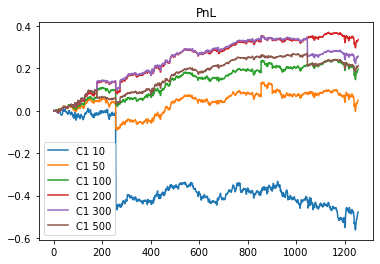

In [216]:
from matplotlib import pyplot as plt

plt.title('PnL')
for TOP_NUMBER in (10, 50, 100, 200, 300, 500):
    pnls, turnovers, sharpe_ratios, A = create_alpha()
    plt.plot(np.cumsum(pnls), label=f'C1 {TOP_NUMBER}')
    sharpe_ratios_year = []
    for i in range(5):
        sharpe_ratio = np.array(pnls[i * T: (i+1) * T]).mean() / np.array(pnls[i * T: (i+1) * T]).std() * (T**0.5)
        sharpe_ratios_year.append(sharpe_ratio)
    print(f"For C1 {TOP_NUMBER} sharp is {(sharpe_ratios_year)}")
plt.legend()
plt.show()


 66%|███████████████████████████████████████████████████▌                          | 830/1257 [00:03<00:01, 229.15it/s]


KeyboardInterrupt: 

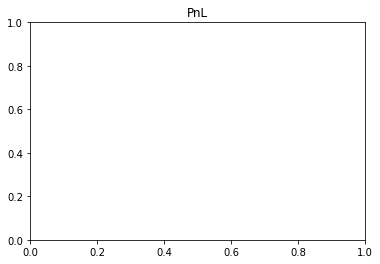

In [230]:
from matplotlib import pyplot as plt

plt.title('PnL')
for TOP_NUMBER in (10, 50, 100, 200, 300, 500):
    pnls, turnovers, sharpe_ratios, A = create_alpha()
    plt.plot(np.cumsum(pnls), label=f'C1 {TOP_NUMBER}')
    sharpe_ratios_year = []
    for i in range(5):
        sharpe_ratio = np.array(pnls[i * T: (i+1) * T]).mean() / np.array(pnls[i * T: (i+1) * T]).std() * (T**0.5)
        sharpe_ratios_year.append(sharpe_ratio)
    print(f"For C1 {TOP_NUMBER} sharp is {(sharpe_ratios_year)}")
plt.legend()
plt.show()


In [228]:
np.mean(turnovers)

1.0093965705153385

In [181]:
turnovers

[0,
 0,
 0,
 0,
 0,
 0,
 175.8979037342197,
 83.53717397524134,
 64.61326243819954,
 70.10912921076098,
 66.85964556364839,
 62.70071444847299,
 63.56821641625778,
 76.62909417212195,
 62.152390168594465,
 49.219905392002,
 55.424627526231895,
 64.10363408608708,
 64.2369932153941,
 61.013604827127786,
 67.32104202019181,
 85.43756211200247,
 72.59862988536244,
 86.9901660920348,
 79.22073661639597,
 83.32311137002654,
 63.44315331509209,
 66.74543514810516,
 121.78145141088348,
 60.474450886291365,
 87.376801810456,
 69.24993113202325,
 67.85384323313377,
 66.24282885512352,
 60.321888431847526,
 100.01461426034508,
 53.835160193548816,
 60.226060941305526,
 60.614562209035064,
 72.5075846006177,
 82.13786363777804,
 63.31490897553584,
 66.14464719761233,
 79.17565026336607,
 77.38414911964627,
 68.92045250143627,
 61.90083282772261,
 62.62607846023609,
 78.65715185627681,
 67.30081508583228,
 79.58996334185937,
 71.96303644965556,
 72.42132521845497,
 74.37831844770848,
 67.562617406

In [119]:
sharpe_ratios_year = []
for i in range(5):
    sharpe_ratio = np.array(pnls[i * T: (i+1) * T]).mean() / np.array(pnls[i * T: (i+1) * T]).std() * (T**0.5)
    sharpe_ratios_year.append(sharpe_ratio)
sharpe_ratios_year

[1.5864964828901589,
 1.0921220653106023,
 2.0209197095902547,
 0.8206763618655363,
 0.24410631572833363]

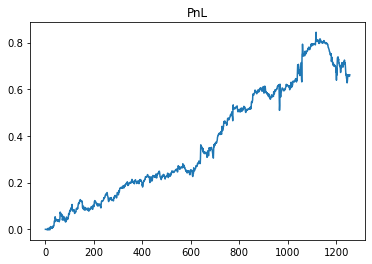

In [120]:
from matplotlib import pyplot as plt

plt.plot(np.cumsum(pnls))
plt.title('PnL')
plt.show()

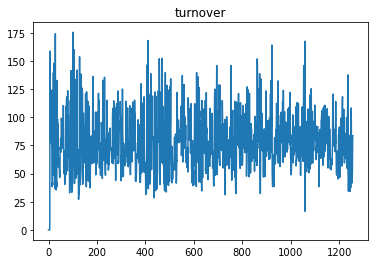

In [121]:
plt.plot(turnovers)
plt.title('turnover')
plt.show()

In [108]:
np.mean(turnovers[1:])

64.6376957020478

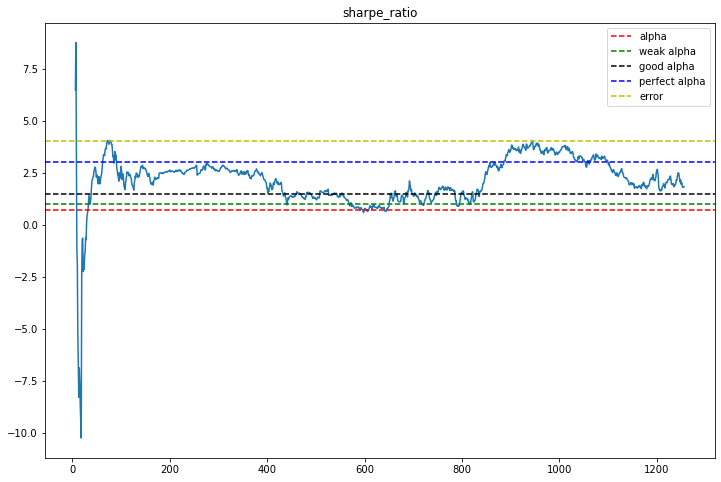

In [21]:
plt.figure(figsize = (12, 8))
plt.plot(sharpe_ratios)
plt.title('sharpe_ratio')
plt.axhline(y=0.7, color='r', linestyle='--', label='alpha')
plt.axhline(y=1, color ='g', linestyle='--', label='weak alpha')
plt.axhline(y=1.5, color ='k', linestyle='--', label='good alpha')
plt.axhline(y=3, color ='b', linestyle='--', label='perfect alpha')
plt.axhline(y=4, color ='y', linestyle='--', label='error')



plt.legend()
plt.show()


In [37]:
Close

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2014-12-17,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,2014-12-26,2014-12-29,2014-12-30,2014-12-31
aan.us,18.1900,18.2470,18.3840,18.3840,18.4040,18.7280,18.6310,18.8160,18.9630,18.9440,...,27.917,28.343,28.333,28.936,29.788,30.027,30.124,30.709,30.431,30.282
aaon.us,5.5553,5.3941,5.1802,5.3719,5.4357,5.5831,5.5024,5.5386,5.5332,5.3219,...,21.103,21.513,21.219,21.445,21.719,21.954,21.916,21.847,21.886,21.935
aap.us,39.7330,39.4960,39.8410,39.8320,39.9900,39.5950,38.9060,39.4470,38.9260,38.6780,...,158.780,159.970,159.080,158.670,160.480,159.520,159.290,160.510,159.320,158.570
aau.us,1.1000,1.1500,1.2900,1.2400,1.2600,1.2400,1.2400,1.2500,1.2200,1.1400,...,0.970,0.960,0.970,0.930,0.910,0.940,0.970,0.920,0.950,0.940
aav.us,6.8300,7.1200,7.2700,7.1100,7.2900,7.2200,7.0000,7.1500,7.1100,7.0300,...,5.150,4.910,5.130,4.760,4.690,4.680,4.600,4.670,4.650,4.790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ziop.us,2.9500,3.0500,3.0800,3.0400,3.1000,3.1900,3.1000,3.1000,3.1100,3.0800,...,4.240,4.270,4.800,4.930,4.690,4.760,4.900,4.990,5.030,5.070
zixi.us,1.7800,1.7000,1.7000,2.2200,2.1200,2.0800,2.0500,2.1000,2.1100,2.0600,...,3.440,3.485,3.610,3.760,3.710,3.730,3.760,3.670,3.630,3.600
zn.us,6.5000,6.4000,6.2900,6.3200,6.3600,6.1800,6.0900,5.9400,6.0400,5.9000,...,1.460,1.460,1.470,1.460,1.450,1.465,1.410,1.380,1.380,1.370
ztr.us,7.3331,7.3331,7.3532,7.3331,7.3898,7.3331,7.2956,7.2956,7.3331,7.3151,...,9.849,10.019,10.113,10.150,10.185,10.185,10.221,10.213,10.196,10.182
